In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binomtest
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import pickle
#fig, ax = plt.subplots(1, figsize=(15, 12))

In [2]:

t = 'Limb_Muscle'
age = 3
dir_path = '../project'
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
save = False ########### IMPORTANT TO SET TO TRUE IF YOU WANT TO SAVE FIGURES
tissues


array(['GAT', 'Limb_Muscle', 'Lung', 'Trachea', 'SCAT', 'Pancreas',
       'Thymus', 'Tongue', 'Large_Intestine', 'Skin'], dtype=object)

# Calculate Statistics 

In [ ]:
# Load the .mat file if it exists ORRRRRR
stats_3m = loadmat(f'{dir_path}/fig_mean_act_corr_{t}_{age}m.mat')
stats_24m = loadmat(f'{dir_path}/fig_mean_act_corr_{t}_24m.mat')
save=True # set to false to run without saving figures

# Check keys in the dictionary
pd.DataFrame(stats_3m['mean_tf_gen'])

In [ ]:
############## Calculate statistics given samples: #####################
dict_tissue = {}
factor = 0.01

print(len(dict_tissue))
for t in tqdm(tissues):
    lams = dict_tissue[t]
    lam3 = lams[0]
    lam24 = lams[1]

    # load data
    data_tf_3m = np.load(f'{dir_path}/data/{t}_tf_data_binary_3m_filt.npy')
    data_tg_3m = np.load(f'{dir_path}/data/{t}_tg_data_binary_3m_filt.npy')

    data_tf_24m = np.load(f'{dir_path}/data/{t}_tf_data_binary_24m_filt.npy')
    data_tg_24m = np.load(f'{dir_path}/data/{t}_tg_data_binary_24m_filt.npy')

    directory_path3 = f'{dir_path}Aging/output_tf_{t}/3m/'
    directory_path24 = f'{dir_path}/Aging/output_tf_{t}/24m/'

    tf_samples3 = np.load(f'{directory_path3}/samples_3m_200000_lam_{lam3}_factor_{factor}.npy') 
    tf_samples24 = np.load(f'{directory_path24}/samples_24m_200000_lam_{lam24}_factor_{factor}.npy') 

    tg_samples3 = np.load(f'{dir_path}/Aging/output_tg_{t}/3m/samples_3m_lam_{lam3}_factor_{factor}_tf_sampled.npy')
    tg_samples24 = np.load(f'{dir_path}/Aging/output_tg_{t}/24m/samples_24m_lam_{lam24}_factor_{factor}_tf_sampled.npy')
    
    rand = np.random.randint(data_tg_3m.shape[0], size=6000)

    cov_mat_tf_tg_gen3 = np.cov(tf_samples3, tg_samples3[rand], rowvar=True)
    cov_mat_tf_tg_gen24 = np.cov(tf_samples24, tg_samples24[rand], rowvar=True)

    cov_mat_tg_tg_gen3 = np.cov(tg_samples3[rand], tg_samples3[rand], rowvar=True)
    cov_mat_tg_tg_gen24 = np.cov(tg_samples24[rand], tg_samples24[rand], rowvar=True)

    #print(f'onto real for tissue {t}')
    cov_mat_tf_tg_real3 = np.cov(data_tf_3m, data_tg_3m[rand], rowvar=True)
    cov_mat_tf_tg_real24 = np.cov(data_tf_24m, data_tg_24m[rand], rowvar=True)

    cov_mat_tg_tg_real3 = np.cov(data_tg_3m[rand], data_tg_3m[rand], rowvar=True)
    cov_mat_tg_tg_real24 = np.cov(data_tg_24m[rand], data_tg_24m[rand], rowvar=True)

    np.save(f'{dir_path}/cov_tg_tg_data_3m_{t}', cov_mat_tg_tg_real3)
    np.save(f'{dir_path}/cov_tg_tg_data_24m_{t}', cov_mat_tg_tg_real24)
    np.save(f'{dir_path}/cov_tg_tg_gen_3m_{t}', cov_mat_tg_tg_gen3)
    np.save(f'{dir_path}/cov_tg_tg_gen_24m_{t}', cov_mat_tg_tg_gen24)

    np.save(f'{dir_path}/cov_tf_tg_data_3m_{t}', cov_mat_tf_tg_real3)
    np.save(f'{dir_path}/cov_tf_tg_data_24m_{t}', cov_mat_tf_tg_real24)
    np.save(f'{dir_path}/cov_tf_tg_gen_3m_{t}', cov_mat_tf_tg_gen3)
    np.save(f'{dir_path}/cov_tf_tg_gen_24m_{t}', cov_mat_tf_tg_gen24)
    

    print(tf_samples24.shape, tg_samples24.shape)
    

3 is 2, 24 is 3
3 is 2, 24 is 3
3 is 3, 24 is 2
3 is 3, 24 is 2
3 is 2, 24 is 2
3 is 3, 24 is 3
3 is 5, 24 is 3
3 is 0.98, 24 is 2
3 is 1, 24 is 1.3
3 is 2, 24 is 5
10


 50%|█████     | 1/2 [02:01<02:01, 121.15s/it]

(1010, 9775) (20761, 9775)


100%|██████████| 2/2 [02:56<00:00, 88.36s/it] 

(849, 5610) (16751, 5610)


In [3]:
import seaborn as sns
from tqdm import tqdm
#fig, ax = plt.subplots(1, figsize=(15, 12))
######### This is just to get the PCC and stuff #############
corr_pcc_tf3 = []
corr_pcc_tg3 = []
mean_pcc_tf3 = []
mean_pcc_tg3 = []

corr_pcc_tf24 = []
corr_pcc_tg24 = []
mean_pcc_tf24 = []
mean_pcc_tg24 = []

corr_pcc_tf_tg3 = []
corr_pcc_tf_tg24 = []

dict_tissue = {}
factor = 0.01
with open("tissue_names_with_lam.txt", "r") as f:
    for line in f:
        parts = line.strip().split()  # split by whitespace
        t = parts[0]
        if np.any(tissues == t):
            lam3 = float(parts[1]) if "." in parts[1] else int(parts[1])
            lam24 = float(parts[2]) if "." in parts[2] else int(parts[2])#int(parts[2])
            print(f'3 is {lam3}, 24 is {lam24}')
            dict_tissue[t] = [lam3, lam24]
f.close()
mean_mean_pcc_tf = np.zeros(len(tissues))
mean_mean_pcc_tg = np.zeros(len(tissues))
mean_mean_pcc_tf_tg = np.zeros(len(tissues))

mean_pcc_tf3 = list(np.load('mean_tf_pcc3.npy'))
mean_pcc_tg3 = list(np.load('mean_tg_pcc3.npy'))

mean_pcc_tf24 = list(np.load('mean_tf_pcc24.npy'))#, np.array(mean_pcc_tf24))
mean_pcc_tg24 = list(np.load('mean_tg_pcc24.npy'))#, np.array(mean_pcc_tg24))

corr_pcc_tf3 = list(np.load('corr_tf_pcc3.npy'))#, np.array(corr_pcc_tf3))
corr_pcc_tf24= list(np.load('corr_tf_pcc24.npy'))#, np.array(corr_pcc_tf24))

corr_pcc_tg3 = list(np.load('corr_tg_pcc3.npy'))#, np.array(corr_pcc_tg3))
corr_pcc_tg24 = list(np.load('corr_tg_pcc24.npy'))#, np.array(corr_pcc_tg24))

corr_pcc_tf_tg3 = list(np.load('corr_tf_tg_pcc3.npy'))#, np.array(corr_pcc_tf_tg3))
corr_pcc_tf_tg24 = list(np.load('corr_tf_tg_pcc24.npy'))#, np.array(corr_pcc_tf_tg24))


3 is 2, 24 is 3
3 is 2, 24 is 3
3 is 3, 24 is 2
3 is 3, 24 is 2
3 is 2, 24 is 2
3 is 3, 24 is 3
3 is 5, 24 is 3
3 is 0.98, 24 is 2
3 is 1, 24 is 1.3
3 is 2, 24 is 5


  0%|          | 0/2 [00:00<?, ?it/s]

tissue is Large_Intestine


 50%|█████     | 1/2 [00:29<00:29, 29.93s/it]

tissue is Skin


100%|██████████| 2/2 [00:56<00:00, 28.32s/it]


[np.float64(0.924314174852207),
 np.float64(0.9919604831382017),
 np.float64(0.9800960228948407),
 np.float64(0.964584621057491),
 np.float64(0.9244844794029905),
 np.float64(0.8799690744048204),
 np.float64(0.9966379433147979),
 np.float64(0.9988071441128655),
 np.float64(0.9930461686804839),
 np.float64(0.9975059517212226)]

In [5]:
print(
f" mean pcc tf: {(np.mean(mean_pcc_tf3)+ np.mean(mean_pcc_tf24))/2}", 
f"| mean pcc tg: {(np.mean(mean_pcc_tg3)+np.mean(mean_pcc_tg24))/2}\n"
f"| corr pcc tf-tf: {(np.mean(corr_pcc_tf3)+np.mean(corr_pcc_tf24))/2}"
f"| corr pcc tg-tg: {(np.mean(corr_pcc_tg3)+np.mean(corr_pcc_tg24))/2}\n"
f"| corr pcc tf-tg: {(np.mean(corr_pcc_tf_tg3)+np.mean(corr_pcc_tf_tg24))/2}"
)

[0.92431417 0.99196048 0.98009602 0.96458462 0.92448448 0.87996907
 0.99663794 0.99880714 0.99304617 0.99750595]
[0.94584499 0.99832681 0.98722252 0.98406026 0.96551167 0.93979397
 0.98581428 0.99676509 0.96806774 0.99631463]
[0.9727048  0.99620066 0.97347106 0.9282068  0.98828293 0.9503957
 0.9993036  0.99911755 0.99267391 0.9989024 ]
[0.92975817 0.99712958 0.98835909 0.97852965 0.96211139 0.92442782
 0.99024355 0.99803487 0.98622398 0.99905584]
[0.70325055 0.92112076 0.78656199 0.83835305 0.892499   0.91730644
 0.94756691 0.92568739 0.98844198 0.9772223 ]
[0.77031269 0.89719645 0.85297065 0.91589391 0.81735186 0.93417195
 0.91753435 0.95246299 0.97408526 0.95714556]
[0.7797138  0.6931848  0.79732094 0.88774617 0.84226872 0.93505649
 0.91457214 0.90736217 0.97816462 0.9103918 ]
[0.7797138  0.6931848  0.79732094 0.88774617 0.84226872 0.93505649
 0.91457214 0.90736217 0.97816462 0.9103918 ]
[0.64008346 0.76182095 0.63902848 0.71578952 0.79492808 0.8256498
 0.79420358 0.74058841 0.864049

In [ ]:
### Make a df with all the stats (dfs are much easier to use in plot generation)
records = []
count = 0
for t in tissues:
    print(t)
    records.append({'Tissue': t, 'Type':'TF', 'Age': '3m', 'metric':'corr', 'val':corr_pcc_tf3[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '24m',  'metric':'corr', 'val': corr_pcc_tf24[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '3m', 'metric':'mean', 'val': mean_pcc_tf3[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '24m', 'metric':'mean', 'val': mean_pcc_tf24[count]})

    records.append({'Tissue': t, 'Type':'TG', 'Age': '3m', 'metric':'corr', 'val': corr_pcc_tg3[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '24m', 'metric':'corr', 'val': corr_pcc_tg24[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '3m', 'metric':'mean', 'val': mean_pcc_tg3[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '24m', 'metric':'mean', 'val': mean_pcc_tg24[count]})
    count+=1

df = pd.DataFrame(records) # a dataframe of tissues and the stats

In [ ]:
dir_path = 'paper_figs_final'

cov_mat_tf_tg_real3 = np.load(f'{dir_path}/cov_tf_tg_data_3m_{t}.npy')
cov_mat_tf_tg_real24 = np.load(f'{dir_path}/cov_tf_tg_data_24m_{t}.npy')

cov_mat_tf_tg_gen3 = np.load(f'{dir_path}/cov_tf_tg_gen_3m_{t}.npy')
cov_mat_tf_tg_gen24 = np.load(f'{dir_path}/cov_tf_tg_gen_24m_{t}.npy')
mask = ~np.eye(cov_mat_tf_tg_real3.shape[0], dtype=bool)

np.corrcoef(cov_mat_tf_tg_gen3.flatten(),cov_mat_tf_tg_real3.flatten())[0,1], t, np.corrcoef(cov_mat_tf_tg_gen24.flatten(),cov_mat_tf_tg_real24.flatten())[0,1]

(6849, 6849) (6849, 6849) (6849, 6849) (6849, 6849)


(np.float64(0.761820953036082), 'Limb_Muscle', np.float64(0.6131466585072948))

In [ ]:
dict_tissue = {}
factor = 0.01
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
dir_path = '../project'


with open("tissue_names_with_lam.txt", "r") as f:
    for line in f:
        parts = line.strip().split()  # split by whitespace
        t = parts[0]
        if np.any(tissues == t):
            lam3 = float(parts[1]) if "." in parts[1] else int(parts[1])
            lam24 = float(parts[2]) if "." in parts[2] else int(parts[2])#int(parts[2])
            print(f' tissue is {t}, 3 is {lam3}, 24 is {lam24}')
            dict_tissue[t] = [lam3, lam24]


# Figure 2: Statistics of the model

 tissue is GAT, 3 is 0.98, 24 is 2
 tissue is SCAT, 3 is 1, 24 is 1.3
 tissue is Limb_Muscle, 3 is 2, 24 is 3
 tissue is Large_Intestine, 3 is 5, 24 is 3
 tissue is Tongue, 3 is 3, 24 is 3
 tissue is Trachea, 3 is 2, 24 is 2
 tissue is Pancreas, 3 is 3, 24 is 2
 tissue is Skin, 3 is 3, 24 is 2
 tissue is Thymus, 3 is 2, 24 is 3
 tissue is Lung, 3 is 2, 24 is 5
tissue is Limb_Muscle
(720801,)
3m means: 849 16394 | 24m means: 849 16394 | TF–TG 3m: 46908801 46908801 | TF–TG 24m: 46908801 46908801
pcc mean tf 3: 0.9919604831382017pcc mean tf 24: 0.9983268065975036pcc mean tg 3: 0.996200663821228 pcc mean tg 24: 0.9971295801042752


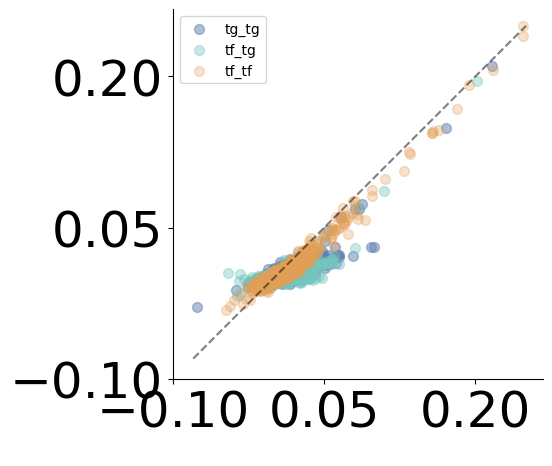

In [24]:

mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['font.family'] = mpl.rcParamsDefault['font.family']
PALETTE_3_ALT = ["#7F7F7F", "#76C7C0", "#C2A5CF"] 
co = "#76C7C0"
ctg = "#7F7F7F"
ctf = "#C2A5CF"
ctf_tf = "#E49E56"
ctg_tg = "#5E7FB0"

def plot_all_cov(t, dict_tissue, type):
    
    print(f'tissue is {t}')
    lams = dict_tissue[t]
    factor = 0.01
    stats_3m = loadmat(f'{dir_path}/fig_mean_act_corr_{t}_3m_final_v2.mat')
    stats_24m = loadmat(f'{dir_path}/fig_mean_act_corr_{t}_24m_final_v2.mat')

    tg_samples3 = np.load(f'{dir_path}/Aging/output_tg_{t}/3m/samples_3m_lam_{lams[0]}_factor_{factor}_tf_sampled.npy')
    tg_samples24 = np.load(f'{dir_path}/Aging/output_tg_{t}/24m/samples_24m_lam_{lams[1]}_factor_{factor}_tf_sampled.npy')

    tg_mean_gen3 = tg_samples3.mean(axis=1)
    tg_mean_gen24 = tg_samples24.mean(axis=1)

    cov_mat_tf_tg_real3 = np.load(f'{dir_path}/cov_tf_tg_data_3m_{t}.npy')
    cov_mat_tf_tg_real3 = cov_mat_tf_tg_real3
    cov_mat_tf_tg_real24 = np.load(f'{dir_path}/cov_tf_tg_data_24m_{t}.npy')

    cov_mat_tf_tg_gen3 = np.load(f'{dir_path}/cov_tf_tg_gen_3m_{t}.npy')
    cov_mat_tf_tg_gen24 = np.load(f'{dir_path}/cov_tf_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_gen3 = np.load(f'{dir_path}/cov_tg_tg_gen_3m_{t}.npy')
    cov_mat_tg_tg_gen24 = np.load(f'{dir_path}/cov_tg_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_data3 = np.load(f'{dir_path}/cov_tg_tg_data_3m_{t}.npy')
    cov_mat_tg_tg_data24 = np.load(f'{dir_path}/cov_tg_tg_data_24m_{t}.npy')


    fig, ax = plt.subplots()# figsize=(24,12))

    # We use this to plot because matplotlib will take too long to make the plot if the number is too high
    rand = np.random.randint(cov_mat_tg_tg_gen3.flatten().shape[0],size = 80000) 
    rand_tf= np.random.randint(stats_24m['corr_tf_data'].flatten().shape[0],size = 60000) 
    rand_tf_tg = np.random.randint(cov_mat_tf_tg_real3.flatten().shape[0],size = 80000) 
    rand_tg = np.random.randint(tg_mean_gen24.flatten().shape[0], size=10000)
        
    
    if type == 'cov':
        ax.scatter(cov_mat_tg_tg_data24.flatten()[rand], cov_mat_tg_tg_gen24.flatten()[rand], c=ctg_tg, s=50, alpha=0.5, label='tg_tg')
        
        ax.scatter(cov_mat_tf_tg_real24.flatten()[rand_tf_tg], cov_mat_tf_tg_gen24.flatten()[rand_tf_tg], c=co, alpha=0.4, s=50, label = 'tf_tg')
        ax.scatter(stats_24m['corr_tf_data'].flatten()[rand_tf], stats_24m['corr_tf_gen'].flatten()[rand_tf], c=ctf_tf, s=50, alpha=0.3, label = 'tf_tf')
        
        maxx = max(stats_24m['corr_tf_data'].flatten().max(), cov_mat_tf_tg_real24.max())
        maxx = max(maxx, cov_mat_tg_tg_data24.flatten()[rand].max())

        minx = min(stats_24m['corr_tf_data'].flatten().min(), cov_mat_tf_tg_real24.min())
        minx = min(stats_24m['corr_tf_data'].flatten().min(), cov_mat_tg_tg_data24.flatten()[rand].min())
        minx = min(minx, -0.08)

        ax.plot([minx,maxx], [minx,maxx], '--', linewidth = 1.5 ,alpha=0.5, c='black')
        plt.xticks([-0.1, 0.05, 0.2])
        plt.yticks([-0.1, 0.05, 0.2]) 
        plt.legend()

    else: 
        ax.plot([-0.02,1.02],[-0.02,1.02],'--', linewidth = 1.2 ,c='black', alpha=0.5, zorder=2)
        ax.scatter(tg_mean_gen24.flatten()[rand_tg], stats_24m['mean_tg_data'].flatten()[rand_tg], c=ctg, alpha=0.5, s=18, label='TG-TG')
        ax.scatter(stats_24m['mean_tf_data'].flatten(), stats_24m['mean_tf_gen'].flatten(), c=ctf, alpha=0.7, s=18, label='TF-TF')
        plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])        
        plt.legend()

    print(
    "3m means:", stats_3m['mean_tf_data'].size, stats_3m['mean_tg_data'].size,
    "| 24m means:", stats_24m['mean_tf_data'].size, stats_24m['mean_tg_data'].size,
    "| TF–TG 3m:", cov_mat_tf_tg_real3.size, cov_mat_tf_tg_gen3.size,
    "| TF–TG 24m:", cov_mat_tf_tg_real24.size, cov_mat_tf_tg_gen24.size
    )

    ax.set_xlabel(' ')#, fontsize=36)
    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    
    ax.grid(False)

    sns.despine(top=True, right=True)
    ax.set_aspect('equal', adjustable='box') 
    #plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)

    for coll in getattr(ax, "collections", []): 
        coll.set_rasterized(True)
    
    if save == True:
        fig.savefig(f'{dir_path}/stat_corr_{t}_24m.pdf', dpi=150, bbox_inches='tight')


tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
type_stat = ['mean', 'cov']

for t in tissues:
    for stat in type_stat:
        plot_all_cov(t, dict_tissue, type=stat)


# MI Comparison

## Load data

In [ ]:
with open("grant_figs_and_data/MI_swap_diff_all.pkl", "rb") as f:
    data_mi_swap_diff_all = pickle.load(f)

with open("grant_figs_and_data/MI_swap_vals.pkl", "rb") as f:
    data_mi_swap_all = pickle.load(f)

data_mi_swap_limb = loadmat(f'grant_figs_and_data/MI_swap_vals_limb.mat')
data_mi_swap_diff_limb = loadmat(f'grant_figs_and_data/MI_swap_diff_limb.mat')
print(data_mi_swap_diff_limb.keys())

mi_no_swap = pd.read_csv('MI_diff_summary_final')
tissues_filt = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)


# Figure 3: OG MI

## Fig 3a: scatter of mi 3m, 24m

In [ ]:

npoints=5000
fig, ax = plt.subplots()

rand = np.random.randint(data_mi_swap_limb['3m'].shape[0], size = npoints) 
mi_3m = data_mi_swap_limb['3m'][rand]
mi_24m = data_mi_swap_limb['24m'][rand]


plt.scatter(mi_3m, mi_24m, color='grey', label='Data', s=10, zorder=4, alpha=0.6)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['24m'].max())]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1]+0.05)
plt.ylim(0, xs[1]+0.05)

sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,xs[1]+0.05])
ax.set_ylim([0,xs[1]+0.05])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('equal', adjustable='box') 

#plt.tight_layout()
#plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
#    fontsize=12,
#    loc='lower right'
#)
if save==True:
    plt.savefig(f'{dir_path}/3m_v_24m_mi_limb.pdf', dpi=600)


## Fig 3b: Get difference in data

In [93]:
def bootstrap_ci(x, n_boot=1000, ci=95):
    means = np.array([np.mean(np.random.choice(x, size=len(x), replace=True)) for _ in range(n_boot)])
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(x), lower, upper

['Thymus' 'Brain_Non-Myeloid' 'Limb_Muscle' 'Skin' 'Pancreas' 'Diaphragm'
 'Trachea' 'Tongue' 'Bladder' 'Large_Intestine' 'GAT' 'MAT' 'SCAT' 'Lung']
['Thymus' 'Limb_Muscle' 'Skin' 'Pancreas' 'Trachea' 'Tongue'
 'Large_Intestine' 'GAT' 'SCAT' 'Lung'] ['GAT' 'Limb_Muscle' 'Lung' 'Trachea' 'SCAT' 'Pancreas' 'Thymus' 'Tongue'
 'Large_Intestine' 'Skin']


/tmp/ipykernel_2298980/63986166.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_props = df_mi.groupby('Tissue').apply(lambda x: pd.Series({


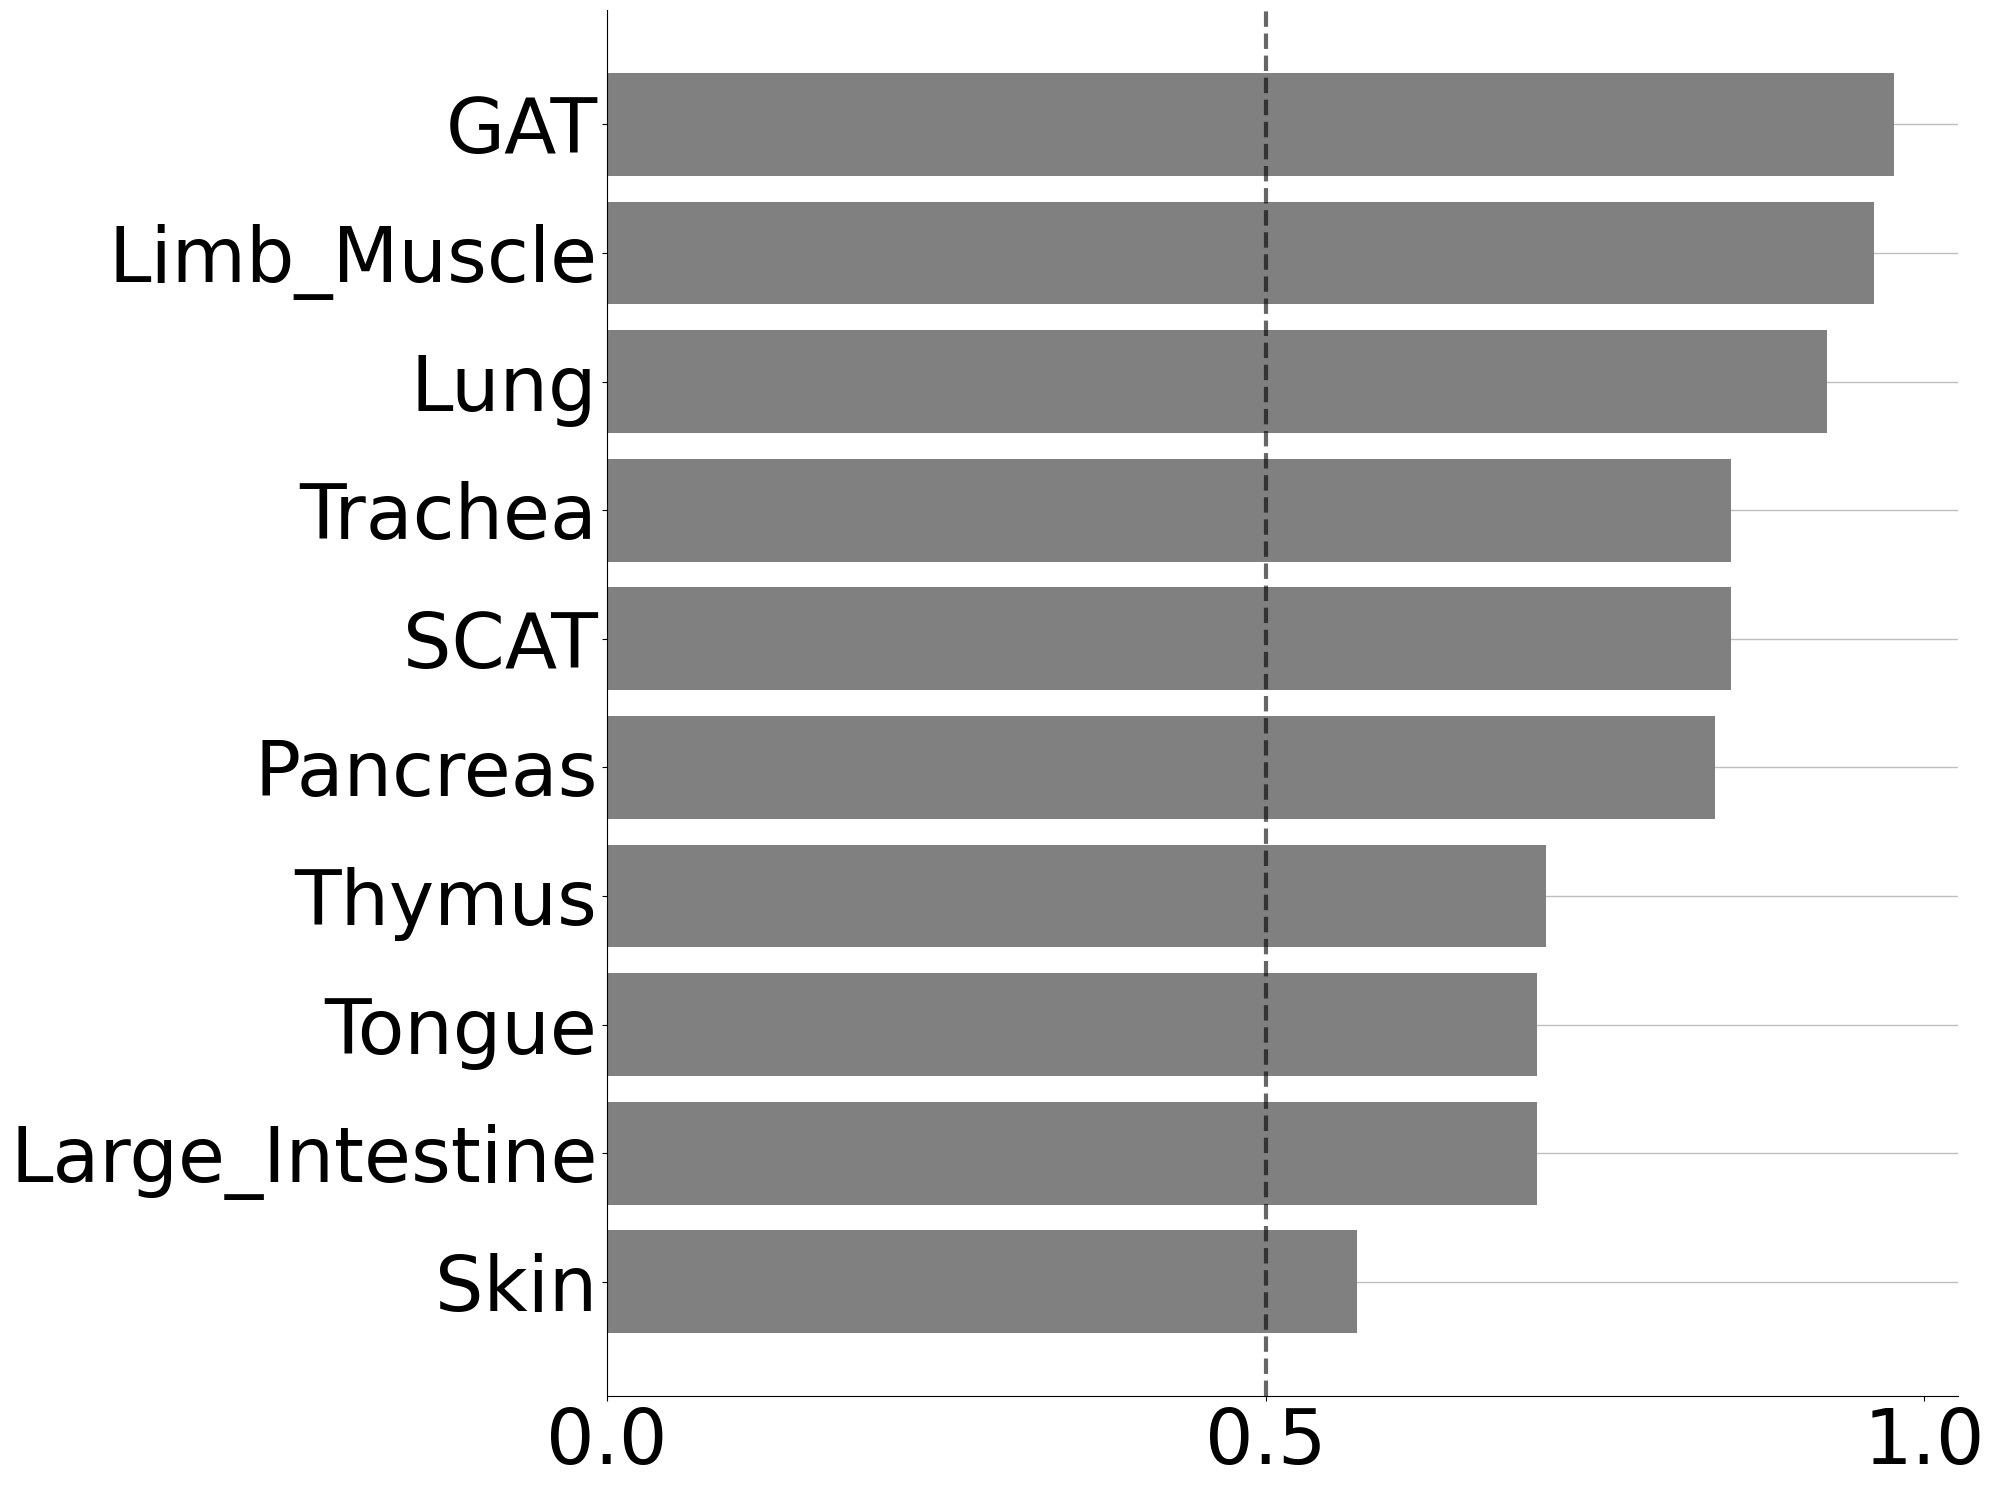

['GAT' 'Limb_Muscle' 'Lung' 'Trachea' 'SCAT' 'Pancreas' 'Thymus' 'Tongue'
 'Large_Intestine' 'Skin'] 10


In [94]:
# Bootstrap CI (returns: median, CI_low, CI_high)
tissues_filt = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
mi_no_swap = pd.read_csv('MI_diff_summary_final')

df_mi = mi_no_swap[mi_no_swap['Tissue'].isin(tissues_filt)]
#df_mi = pd.read_csv('MI_diff_summary,csv')#df_mi_diff[df_mi_diff['Type']=='m3_network_in_24m_distribution']

# Proportion + p-value
summary_stats = df_mi.groupby('Tissue').apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff'] > 0),
    'Count': len(x),
    'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

# Sort by proportion
summary_stats.sort_values('Proportion_Positive', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
colors = ['#2C3E50' if p < 0.05 else '#D35400' for p in summary_stats['P_value']]
bars = plt.barh(summary_stats['Tissue'], summary_stats['Proportion_Positive'], color='grey')
sns.despine(left=False, bottom=False)


plt.axvline(0.5, linestyle='--', linewidth=3, color='black', zorder=2, alpha=0.6)
plt.xticks([0, 0.5, 1],fontsize=55)
plt.yticks(fontsize=55)
plt.grid(axis='y', color='grey', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.savefig(f'{dir_path}/proportion_positive_MI_plot.pdf', dpi=600)
plt.show()
np.save(f'{dir_path}/tissue_order_by_MI_prop', summary_stats['Tissue'].unique()[::-1])

# Figure 4: MI swaps

### Latex writing code

In [24]:

# This writes a text file for a latex table
with open("mean_MI.txt", "w") as f:

    f.write('\\begin{table}[h!]\\n')
    f.write('\\centering \n\\caption{Chosen Regularization Parameter $\\lambda$}\n')
    f.write('\\begin{tabular}{l c c r}\n\\hline\n')
    f.write('Tissue & 3m & 24m & Rejuvinating Network & Rejuvinating Distribution\\ \n \\hline\n')

    for t in tissues_filt:
        #'3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution'
        # dict_keys(['3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']))
        mi_3m = data_mi_swap_all[t]['3m']
        mi_24m = data_mi_swap_all[t]['24m']
        mi_3m_24m = data_mi_swap_all[t]['3m distribution in 24m network']
        mi_24m_3m = data_mi_swap_all[t]['3m network in 24m distribution']
        diff = mi_3m_24m - mi_24m 
        diff2 = mi_24m_3m - mi_24m 
        print(diff.mean(), diff2.mean())
        
        f.write(f'{t} & {mi_3m.mean():.2f}, & {mi_24m.mean():.2f} & {mi_3m_24m.mean():.2f} & {mi_24m_3m.mean():.2f} & {diff.mean()} \\\\ \n')

    f.write('\\hline\n\\end{tabular}\n\\label{tab:fruit}\n\\end{table}')

f.close()

0.11730421 0.038835634
0.041986078 0.016139966
0.00526212 0.027102849
0.017968278 -0.00237601
0.13419098 0.00380784
0.07286904 -0.018615881
-0.0019745152 0.013451755
0.013762934 -0.000835749
0.02699696 -0.017115258
0.036098637 -0.031724


###

In [51]:

def test_input_vs_grn(data_mi_swap_all, young_key='3m',
                      input_key='3m distribution in 24m network',
                      grn_key='3m network in 24m distribution',
                      n_boot=10000, alternative='greater'):
    """
    Compare input rejuvenation vs GRN rejuvenation across tissues. Outputs and prints the statistics summaries (not actual MI)

    Inputs:
        data_mi_swap_all: dict[tissue -> dict[str -> np.ndarray]], each tissue maps to dicts with MI arrays for each condition.
        young_key : str, label for youthful baseline (e.g., '3m').
        input_key : str, label for input rejuvenation (old network, young inputs).
        grn_key : str, label for GRN rejuvenation (young network, old inputs).
        n_boot : int, number of bootstrap resamples for CI.
        alternative : str, 'greater' tests whether input rejuvenation > GRN rejuvenation.

    Output:
        summary : dict
            {
            'tissues': list,
            'frac_input': np.ndarray,
            'frac_grn': np.ndarray,
            'delta': np.ndarray,
            'p_cross_tissue': float,
            'ci_mean_delta': (low, high)
            }
    """

    tissues, frac_input, frac_grn, delta = [], [], [], []
    ts = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
    # --- per-tissue summaries ---
    for t in ts:
        mi_young = np.asarray(data_mi_swap_all[t][young_key])
        mi_YO = np.asarray(data_mi_swap_all[t][input_key])
        mi_OY = np.asarray(data_mi_swap_all[t][grn_key])

        # avoid nans and zeros
        mask = np.isfinite(mi_young) & np.isfinite(mi_YO) & np.isfinite(mi_OY)
        mi_young, mi_YO, mi_OY = mi_young[mask], mi_YO[mask], mi_OY[mask]

        if mi_young.size == 0:
            continue

        fi = min(np.nanmean(mi_YO) / np.nanmean(mi_young),1)
        fg = min(np.nanmean(mi_OY) / np.nanmean(mi_young),1)
        d  = fi - fg

        tissues.append(t)
        frac_input.append(fi)
        frac_grn.append(fg)
        delta.append(d)

    frac_input = np.array(frac_input)
    frac_grn   = np.array(frac_grn)
    delta      = np.array(delta)

    # --- cross-tissue paired test ---
    res = wilcoxon(delta, alternative=alternative)
    p_cross = res.pvalue

    # --- bootstrap CI for mean delta ---
    boot = [np.mean(np.random.choice(delta, size=len(delta), replace=True))
            for _ in range(n_boot)]
    ci_low, ci_high = np.percentile(boot, [2.5, 97.5])


    # delta is your array of tissue-level differences
    res_t = ttest_rel(frac_input, frac_grn, alternative='greater')


    # --- print summary ---
    print("Tissue-level MI restoration summary")
    print("----------------------------------------------------------")
    print(f"{'Tissue % restored':20s} {'Distribution':>12s} {'GRN':>6s} {'Δ (Input−GRN)':>17s}")
    for t, fi, fg, d in zip(tissues, frac_input, frac_grn, delta):
        print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")
    print("----------------------------------------------------------")
    
    print(f"Across tissues: median % restored = {np.median(frac_input):.3f} for TF dist & {np.median(frac_grn):.3f} for GRN")
    print(f"Across tissues: mean % restored = {np.mean(frac_input):.3f} for TF dist & {np.mean(frac_grn):.3f} for GRN")

    print(f"Across tissues: median Δ %restored = {np.median(delta):.3f}, "
          f"mean Δ %restored = {np.mean(delta):.3f}")

    #print(f"95% bootstrap CI for mean Δ: [{ci_low:.3f}, {ci_high:.3f}]")
    print(f"Wilcoxon signed-rank, one-sided pval = {p_cross:.4g}")
    print(f"Paired t-test: statistic = {res_t.statistic:.3f}, p = {res_t.pvalue:.4f}")


    return {
        'tissues': tissues,
        'frac_input': frac_input,
        'frac_grn': frac_grn,
        'delta': delta,
        'p_cross_tissue': p_cross,
        'ci_mean_delta': (ci_low, ci_high)
    }

results = test_input_vs_grn(data_mi_swap_all)

Tissue-level MI restoration summary
----------------------------------------------------------
Tissue % restored    Distribution    GRN     Δ (Input−GRN)
GAT                      73.1        39.6          33.5
Limb_Muscle              63.0        36.9          26.2
Lung                     48.2        81.6         -33.4
Trachea                  98.5        73.2          25.4
SCAT                     89.4        38.5          50.9
Pancreas                100.0        43.6          56.4
Thymus                   73.7        96.9         -23.2
Tongue                  100.0        86.6          13.4
Large_Intestine         100.0        73.3          26.7
Skin                    100.0        69.3          30.7
----------------------------------------------------------
Across tissues: median % restored = 0.940 for TF dist & 0.712 for GRN
Across tissues: mean % restored = 0.846 for TF dist & 0.639 for GRN
Across tissues: median Δ %restored = 0.264, mean Δ %restored = 0.207
Wilcoxon signed-rank

## **Figure 4c** : scatter plot of MI after swaps

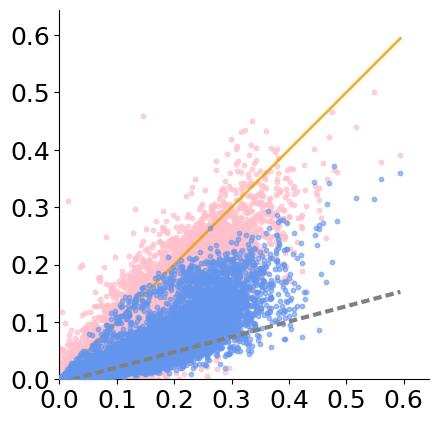

In [8]:
#### Example for Limb Muscle ########
##########################################################
fig, ax = plt.subplots()

colors = sns.color_palette("colorblind", 3)
npoints = 5000

# Or randomly select n genes to plot, maybe < 5000 (otherwise the scatter plot will not generate and hard to see)
# **Make sure you use the same genes for scatter plot or it will be wrong**
rand = np.random.randint(data_mi_swap_limb['3m'].shape[0], size = npoints) 
mi_3m = data_mi_swap_limb['3m'][rand]
mi_24m = data_mi_swap_limb['24m'][rand]
mi_3m_24m = data_mi_swap_limb['3m distribution in 24m network'][rand]
mi_24m_3m = data_mi_swap_limb['3m network in 24m distribution'][rand]

# This is to add a trend line from the scatter plot in Figure 3 (3m vs 24m)
m, b = np.polyfit(mi_3m[0], mi_24m[0], 1)
xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
ys = m*np.array(xs) + b

#plt.scatter(mi_3m, mi_24m, color='grey', s=10, zorder=4, alpha=0.6) # If you want to directly include data from figure 3
plt.scatter(mi_3m, mi_3m_24m, color='pink', label='Rejuvinating Input', s=10, alpha=0.7)
plt.scatter(mi_3m, mi_24m_3m, color='cornflowerblue', label='Rejuvinating GRN' , zorder=4, s=10, alpha=0.6)

plt.plot(xs, ys, linestyle='--',  dashes=(2,1), color='grey', alpha=1, linewidth=3, zorder=5,label='3m v 24m trend')
plt.plot(xs, xs, linestyle='-', color='#E69F00', alpha=0.8, linewidth=2, zorder=1, label='x=y')
    
plt.xlim(0, xs[1]+0.05)
plt.ylim(0, xs[1]+0.05)

sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,xs[1]+0.05])
ax.set_ylim([0,xs[1]+0.05])

plt.xlabel(f'MI 3m',fontsize=28)
plt.xlabel(f'MI 24m',fontsize=28)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('equal', adjustable='box') 

#plt.tight_layout()
plt.legend(
    fontsize=12,
    loc='lower right'
)
for coll in getattr(ax, "collections", []):  # collections = scatter plots
        coll.set_rasterized(True)

if save == True:
    plt.savefig(f'{dir_path}/Limb_Muscle_MI_swap.pdf', dpi=600)


In [63]:
summary_stats = df_mi.groupby(['Tissue','Type']).apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff']),
    'Count': len(x),
    #'std' : np.std(x['MI_diff']),
    #'se' : np.std(x['MI_diff'])/np.sqrt(len(x['MI_diff']))
    #'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

type_sort = 'm3_distribution_in_24m_network'
test = np.array(-1*summary_stats[summary_stats['Type']==type_sort]['Proportion_Positive'])

types = summary_stats['Type'].unique()
palette = sns.color_palette("colorblind", n_colors=len(types))
colors = dict(zip(types, palette))
print(summary_stats['Type'])

type_colors = {
    '3m vs 24m': 'grey',  # light green
    '3m distribution in 24m network': 'pink',  # orange
    '3m network in 24m distribution': 'cornflowerblue'  # blue
}

summary_stats['Color'] = summary_stats['Type'].map(type_colors)

# turn the Tissue column into a categorical with that order
summary_stats["Tissue"] = pd.Categorical(summary_stats["Tissue"],
                                         categories=tissues[::-1],
                                         ordered=True)

# then sort by that column
summary_stats.sort_values("Tissue", inplace=True)

# regenerate tissues list & y positions
tissues = summary_stats["Tissue"].cat.categories

y_pos = np.arange(len(tissues))

# Set bar parameters
bar_height = 0.23


fig, ax = plt.subplots(figsize=(20, 15))
plt.grid(axis='y', color='grey', linestyle='-', linewidth=1, alpha=0.5)

#ns = np.array([2,0,1])
for i, type_label in enumerate(types):
    m = i#ns[i]
    # Offset each type's bars so they don't overlap
    subset = summary_stats[summary_stats['Type'] == type_label]
    heights = np.array(subset['Proportion_Positive'])

    xerr = [heights - subset['std'], heights+subset['std']]
    offset = (m - (len(types)-1)/2) * bar_height  # center offsets
    ax.barh(y_pos + offset, heights, height=bar_height,
            label=type_label, color=subset['Color'], zorder=1)
    '''
    ax.errorbar(
        heights, y_pos + offset,
        xerr=subset['std'],
        fmt='none', elinewidth=1.5, capsize=3, capthick=1.5, ecolor='black', zorder=0
    )
    '''

y_pos = np.arange(len(tissues))  # one per tissue


ax.set_yticks(y_pos)
ax.set_yticklabels(tissues, fontsize=55)
xs = [-0.1, 0, 0.1, 0.2]
ax.set_xticks(xs)

plt.axvline(0, linestyle='--', linewidth=3, color='black', zorder=2, alpha=0.6)

ax.set_xticklabels(xs, fontsize=55)
sns.despine(left=False, bottom=False, top=True, right=True)
#plt.legend(handles[::-1], label, fontsize=30)

plt.tight_layout()
if save == True:
    plt.savefig(f'{dir_path}/MI_swap_summary.pdf', dpi=300)
plt.show()

(dict_keys(['__header__', '__version__', '__globals__', 'MI_3m', 'MI_24m', 'MI_ki_top3', 'MI_ki_top5', 'MI_ki_top8']),
 dict_keys(['__header__', '__version__', '__globals__', '3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']),
 dict_keys(['__header__', '__version__', '__globals__', '3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution']),
 dict_keys(['__header__', '__version__', '__globals__', 'MI_3m', 'MI_24m', 'MI_ki_top3', 'MI_ki_top5', 'MI_ki_top8']))

# Figure 5: structure

## Fig 5a: Out degrees

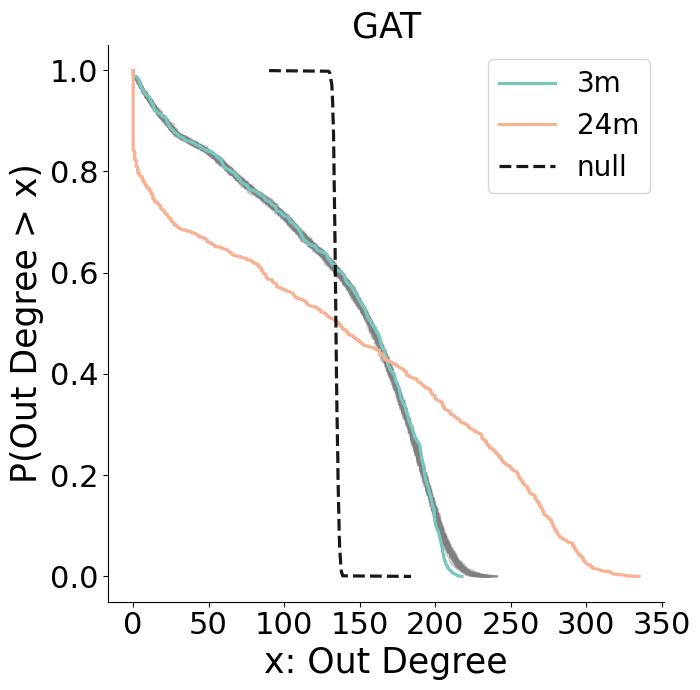

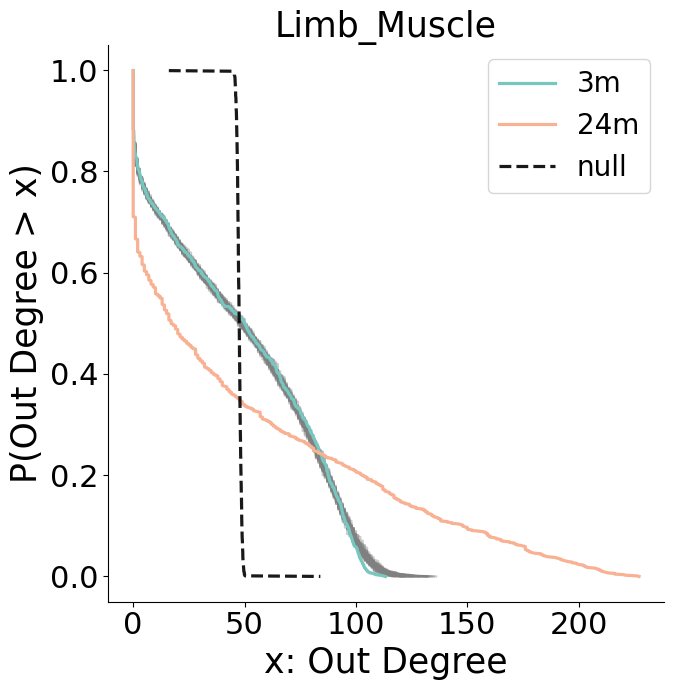

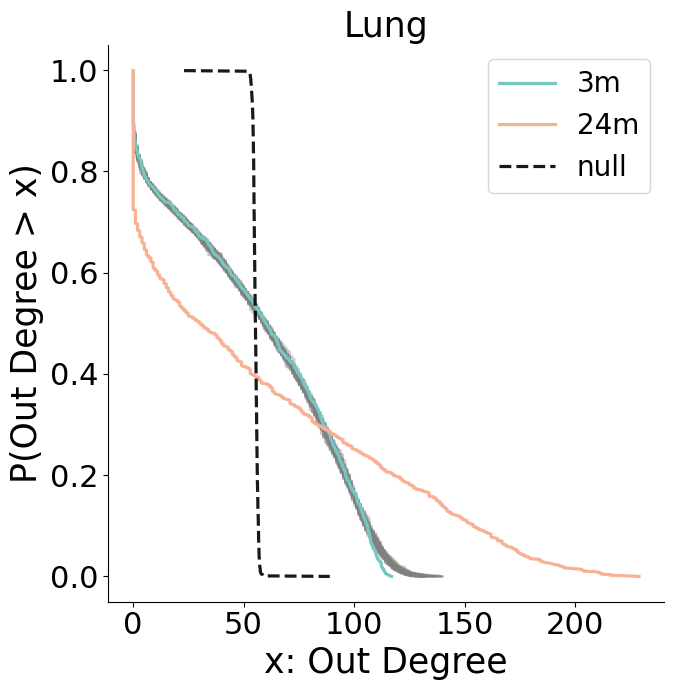

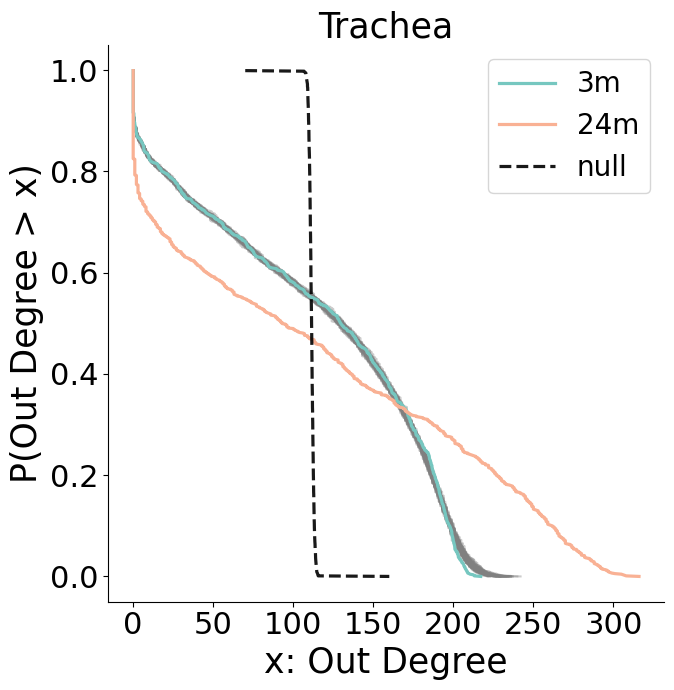

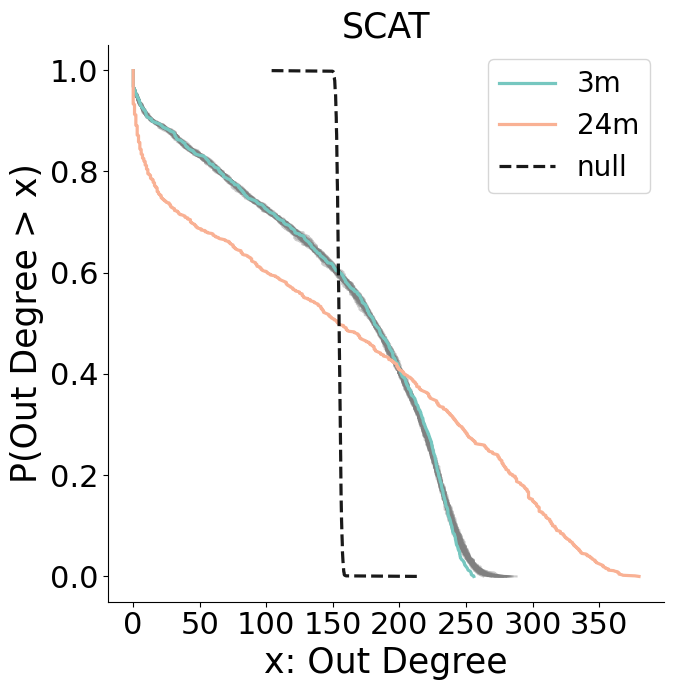

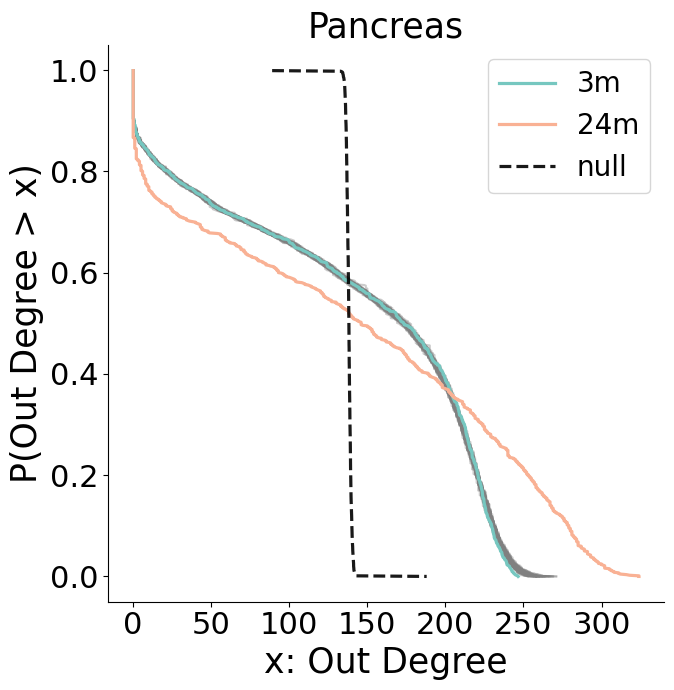

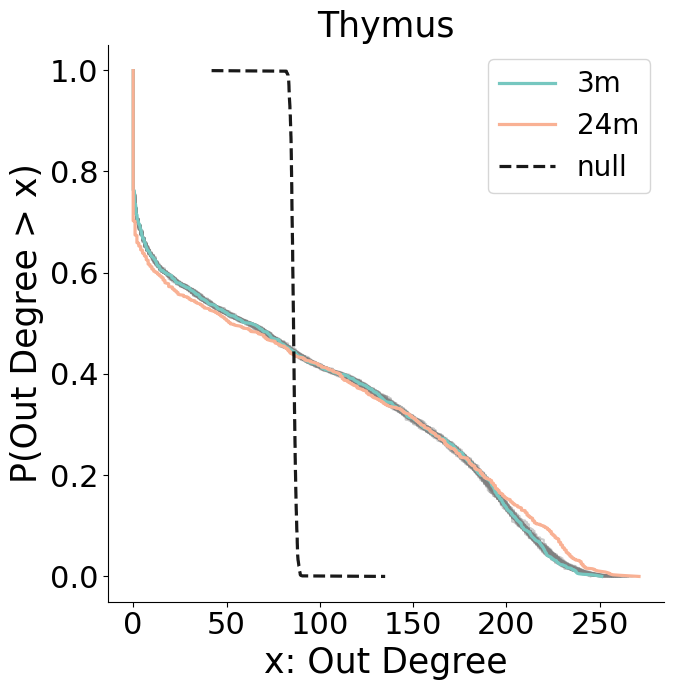

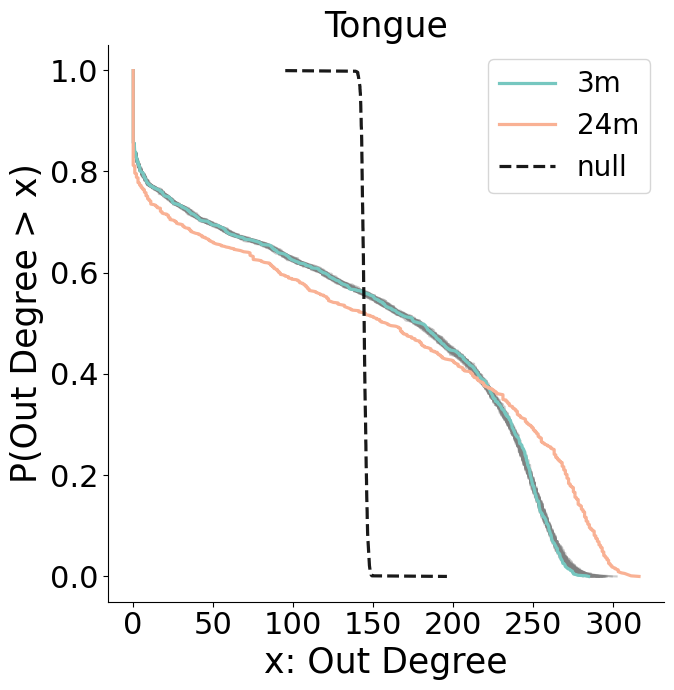

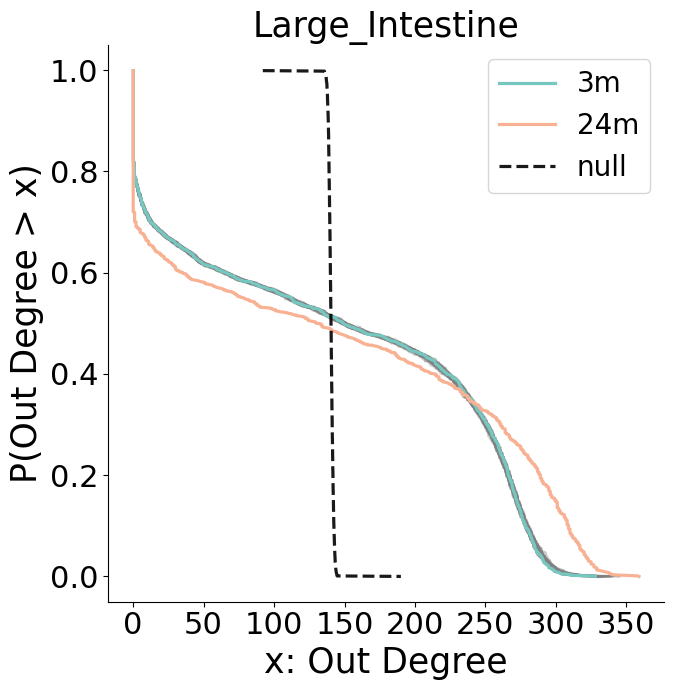

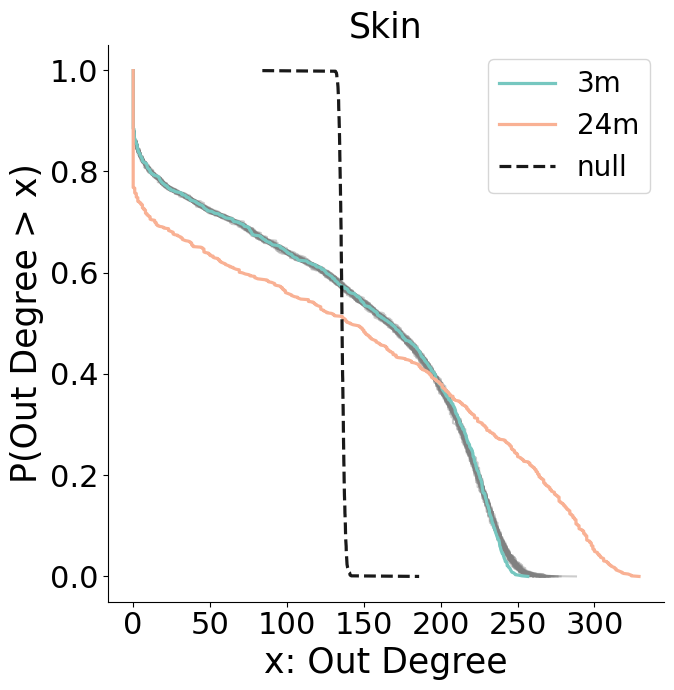

In [47]:
palette = ['#76c7c0', '#f9b194']  
age_tf_dense = 3
age_tf_sparse = 24


for t in tissues:
    fig1, ax = plt.subplots(figsize=(11,7))
    out_deg_tf3m = np.load(f'out_deg_{t}_{age_tf_dense}m_tf_corrected_sp_sp_age_{age_tf_sparse}m.npy')
    out_deg_tf24m = np.load(f'out_deg_{t}_{age_tf_sparse}m_tf_corrected_sp_dense_age_{age_tf_dense}m.npy')
    out_deg_null = np.load(f'out_deg_{t}_null_tf.npy')[1::2]

    extend_null = np.append(out_deg_null.min()-5 , np.sort(out_deg_null.mean(axis=0)))
    final_null = np.append(extend_null, out_deg_null.max()+5)
    niters = out_deg_tf3m.shape[0]
    
    for i in range(niters):
        sorted_data_dense = np.sort(out_deg_tf3m[i]) 
        ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense) 

        #sorted_data_null = np.sort(out_deg_null[i])
        #ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

        # Plot each iteration as very light
        plt.figure(fig1)
        plt.plot(sorted_data_dense, ccdf_dense , markersize=4, c = 'grey', alpha = 0.4)
        #plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)


    sorted_data_dense = np.sort(out_deg_tf3m.mean(axis=0)) 
    sorted_data_sparse = np.sort(out_deg_tf24m) 
    sorted_data_null = final_null #np.sort(out_deg_null.mean(axis=0)) 

    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense) 
    ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse) 
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    plt.plot(sorted_data_dense, ccdf_dense  , c=palette[0],label=f'{age_tf_dense}m', linewidth=2.3)
    plt.plot(sorted_data_sparse, ccdf_sparse  , c=palette[1],label=f'{age_tf_sparse}m', linewidth=2.3)
    plt.plot(sorted_data_null, ccdf_null  , '--',label='null', linewidth=2.3,c='black', alpha =.9)


    plt.legend(fontsize = 20)
    plt.title(f'{t}', fontsize=25)
    plt.ylabel('P(Out Degree > x)',fontsize = 25)
    plt.xlabel('x: Out Degree',fontsize = 25)
    plt.grid(False)

    ax.set_box_aspect(1)

    sns.despine(left=False, bottom=False, top=True, right=True)

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.tight_layout()
    plt.savefig(f'paper_figs_final/out_deg_TF_{t}.pdf', dpi=200)


    

## Fig 5b: Loops

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

keep = ['+++', '-+-', '+--','--+'] # which type of IFL/IFFL loops do you want?
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

records_IFL=[]
records_IFFL=[]
for t in tissues:
    if not os.path.exists(f'IFFL_df_{t}.csv'):
        continue
    motif_df = pd.read_csv(f'IFFL_df_{t}.csv')
    counts_df = pd.read_csv(f'IFFL_counts_df_{t}.csv')

    motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :] # keep patterns you want
    counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
    
    
    for pattern in counts_df_filtered['pattern'].unique(): # for each type...

        sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
        count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0 # count the number in 3m
        count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0 # and 24m 
        
        delta = count_3m - count_24m  # or count_24m - count_3m depending on what you want

        # This replaces the sign of the GRN with a more standard one: +->promotes and - -| inhibits
        # For IFFL it goes a-b, a-c, c-b and IFFL is a-b, b-c, c-b (You can see is more clearly in the graphic in the SI)
        pattern = pattern.replace('+++', '---') 
        pattern = pattern.replace('-+-', '+-+')
        pattern = pattern.replace('+--', '-++')
        pattern = pattern.replace('--+', '++-')

        records_IFFL.append({
            'Tissue': t.replace('_', ' '), # This just makes it easier for axes labels Limb_Muscle->Limb Muscle
            'Pattern': pattern,
            'count 24m': count_24m,
            'count 3m': count_3m,
            'ΔCount (3m - 24m)': delta
        })

    ###########################
    #### Same thing, just with IFL instead
    if not os.path.exists(f'IFL_df_{t}.csv'):
        continue
    motif_df = pd.read_csv(f'IFL_df_{t}.csv')
    counts_df = pd.read_csv(f'IFL_counts_df_{t}.csv')

    motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
    counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
    
    
    for pattern in counts_df_filtered['pattern'].unique():
        sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
        
        count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0
        count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0
        
        delta = count_3m - count_24m  # or count_3m - count_24m depending on what you want
        pattern = pattern.replace('+++', '---')
        pattern = pattern.replace('-+-', '+-+')
        pattern = pattern.replace('+--', '-++')
        pattern = pattern.replace('--+', '++-')

        records_IFL.append({
            'Tissue': t.replace('_', ' '),
            'Pattern': pattern,
            'count 24m': count_24m,
            'count 3m': count_3m,
            'ΔCount (3m - 24m)': delta
        })
    
# Convert to DataFrame
diff_df_IFFL = pd.DataFrame(records_IFFL)
diff_df_IFL = pd.DataFrame(records_IFL)

# Optional: pick a specific pattern if you want to show just one
# diff_df = diff_df[diff_df['Pattern'] == '++']

counts_df.head, motif_df.head

(<bound method NDFrame.head of     age pattern          count
 0     3     +++  540345.714286
 1     3     ++-      20.000000
 2     3     +-+      12.380952
 3     3     +--  721813.333333
 4     3     -++  654006.666667
 5     3     -+-      20.952381
 6     3     --+      20.952381
 7     3     ---  872861.904762
 8    24     +++  385915.238095
 9    24     ++-      85.714286
 10   24     +-+     115.238095
 11   24     +--  517660.952381
 12   24     -++  435904.761905
 13   24     -+-     102.857143
 14   24     --+     114.285714
 15   24     ---  581306.666667>,
 <bound method NDFrame.head of          age      A      B      C pattern
 0          3  Ikzf4  Cebpz  Mypop     +--
 1          3   Spen  Rexo4  Atf6b     -++
 2          3   Arnt  Hoxa4  Safb2     ---
 3          3  Clock    Mlx   Lhx2     -++
 4          3  Grhl2  Dzip1   Etv6     +--
 ...      ...    ...    ...    ...     ...
 4945818   24   Nfib   Atf6  Foxj2     +++
 4945819   24  Prdm4  Klf11  Fosl1     ---
 494582

## SI Figure of all loop types and tissues

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/4175330749.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/4175330749.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)


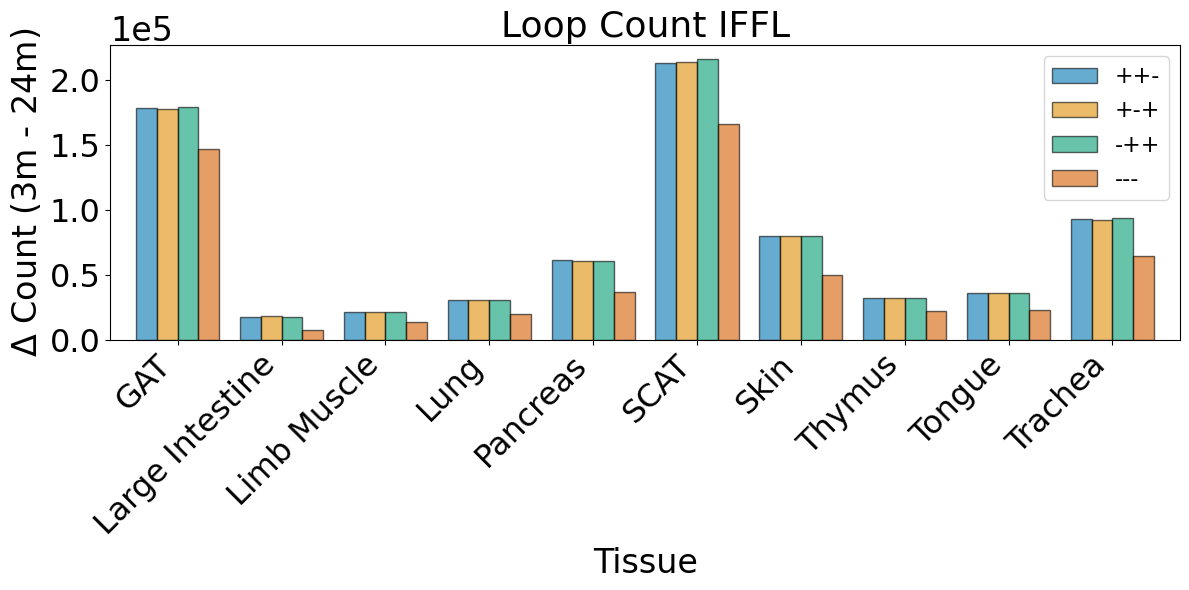

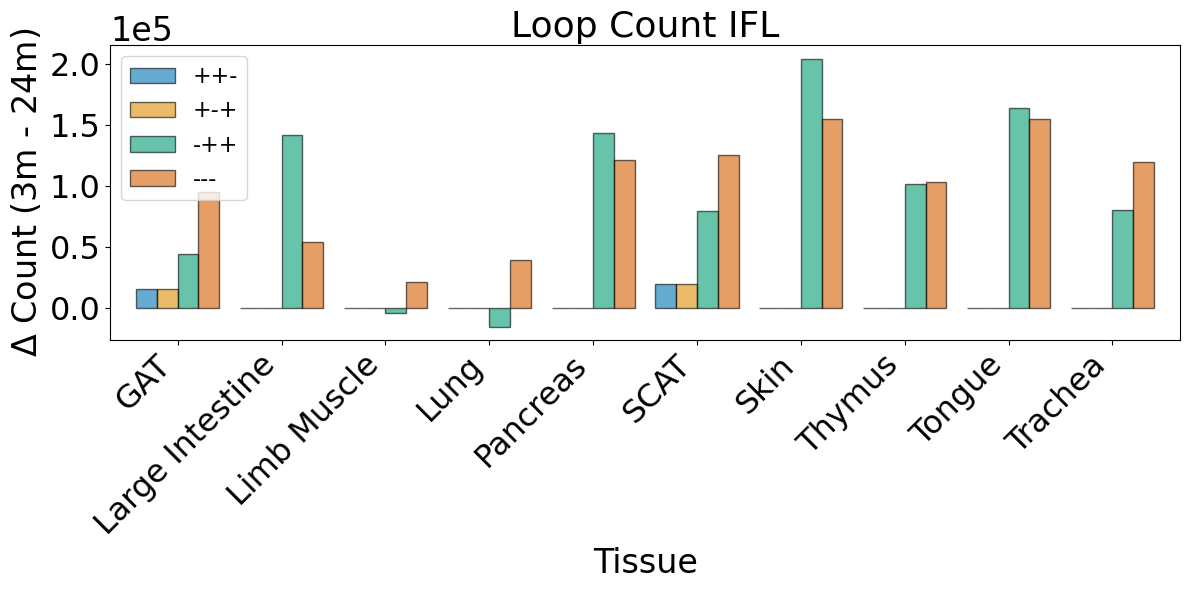

In [145]:
colors = sns.color_palette("colorblind", 12) # color blind friendly color choices
# Plot

pivot_df_IFFL = diff_df_IFFL.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)

fig, ax = plt.subplots(figsize=(12, 7))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)
pivot_df_IFFL.plot(kind='bar', width=0.8, figsize=(12, 6),ax=ax, color=colors[:4], alpha=0.6,edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel('Tissue', fontsize=24)
plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
plt.title('Loop Count IFFL', fontsize=26)
plt.legend(
        fontsize=16,
        markerscale=2.5
    )
plt.tight_layout()
if save == True:
    plt.savefig(f'{dir_path}/Tissue_IFFL_count_summary.pdf', dpi=300)


pivot_df_IFL = diff_df_IFL.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)

fig, ax = plt.subplots(figsize=(12, 7))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)
pivot_df_IFL.plot(kind='bar', width=0.8, figsize=(12, 6),ax=ax, color=colors[:4], alpha=0.6,edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel('Tissue', fontsize=24)
plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
plt.title('Loop Count IFL', fontsize=26)
plt.legend(
        fontsize=16,
        markerscale=2.5
    )
plt.tight_layout()
if save ==True: 
    plt.savefig(f'{dir_path}/Tissue_IFL_count_summary.pdf', dpi=300)


## Figure 5b: Loop counts IFFL/IFL summed

In [149]:
t='Limb_Muscle'
keep = ['+++', '-+-', '+--','--+']
#keep = ['--+']

tissues_needed = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
tissues_needed = ['Limb_Muscle']#np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

count_3m_tot = np.zeros((len(tissues), 2))
count_24m_tot = np.zeros((len(tissues), 2))
nt = 0
for t in tissues:
    records=[]
    n = 0
    for loop_type in ['IFFL', 'IFL']:

        if not os.path.exists(f'{loop_type}_df_{t}.csv'):
            print(f'test, {t}')
            continue
        #print(f'tissue is {t}')
        motif_df = pd.read_csv(f'{loop_type}_df_{t}.csv')
        counts_df = pd.read_csv(f'{loop_type}_counts_df_{t}.csv')
        #print(counts_df)
        motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
        counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
        
        
        for pattern in counts_df_filtered['pattern'].unique():
            sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
            
            count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0
            count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0
            count_3m_tot[nt, n] += count_3m
            count_24m_tot[nt, n] += count_24m

            delta = count_3m - count_24m  # or count_3m - count_24m depending on what you want
            ts = t.replace('_', ' ')
            norm = count_24m + count_3m
            print(f'{ts} & {loop_type} & {pattern} & {count_3m} & {count_24m} \\\\')
            records.append({
                'Tissue': ts,
                'Pattern': pattern,
                'count 24m': count_24m/norm,
                'count 3m': count_3m/norm,
                'Loop Type': loop_type
            })
    
        palette = ['#76c7c0', '#f9b194']  # Color choice
        n+=1
    diff_df = pd.DataFrame(records)
    nt += 1

    df_totals = (diff_df
                .groupby(['Tissue', 'Loop Type'])[['count 3m', 'count 24m']]
                .sum()
                .reset_index())

    df_long = df_totals.melt(
        id_vars=['Tissue','Loop Type'],
        value_vars=['count 3m', 'count 24m'],
        var_name='Age',
        value_name='Count'
    )

    df_long['Age'] = df_long['Age'].str.replace('count ', '', regex=False)  # -> '3m' / '24m'
    df_long['Tissue'] = df_long['Tissue'].str.replace('_', ' ', regex=False)  # -> '3m' / '24m'
    
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(27)
    sns.barplot(data=df_long, x='Loop Type', y='Count', hue='Age', palette=palette, alpha=1)
    sns.despine(left=False, bottom=False, top=True, right=True)
    plt.xlabel("", fontsize=0)
    plt.ylabel(f"Total Loop Count", fontsize=27)
    #plt.ylabel("MI Swapped", fontsize=23)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(f'{ts}', fontsize = 27)
    
    #plt.legend(
    #    fontsize=20,
    #    loc='upper left',
    #    bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
    #)
    
    plt.legend(fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'paper_figs_final/both_loops_counts_summed_summary_{t}.pdf', dpi=200)
    plt.show()
    

counts_df.head, motif_df.head, tissues_needed, count_24m_tot


counts_df.head, motif_df.head

GAT & IFFL & +++ & 159015.6862745098 & 12395.098039215687 \\
GAT & IFFL & +-- & 194536.27450980392 & 15494.117647058823 \\
GAT & IFFL & -+- & 194230.39215686277 & 16523.529411764706 \\
GAT & IFFL & --+ & 194494.11764705885 & 16239.21568627451 \\
GAT & IFL & +++ & 526340.9523809524 & 431140.0 \\
GAT & IFL & +-- & 626433.3333333334 & 582480.0 \\
GAT & IFL & -+- & 15466.666666666666 & 64.76190476190476 \\
GAT & IFL & --+ & 15283.809523809525 & 46.66666666666666 \\
Limb Muscle & IFFL & +++ & 14562.745098039217 & 487.2549019607843 \\
Limb Muscle & IFFL & +-- & 22122.549019607843 & 956.8627450980392 \\
Limb Muscle & IFFL & -+- & 22645.098039215685 & 1243.137254901961 \\
Limb Muscle & IFFL & --+ & 22155.88235294117 & 979.4117647058824 \\
Limb Muscle & IFL & +++ & 74967.61904761905 & 54140.0 \\
Limb Muscle & IFL & +-- & 99728.57142857143 & 103730.47619047618 \\
Lung & IFFL & +++ & 20885.29411764706 & 522.5490196078431 \\
Lung & IFFL & +-- & 31920.58823529412 & 1038.235294117647 \\
Lung & IFFL 

(<bound method NDFrame.head of     age pattern          count
 0     3     +++  540345.714286
 1     3     ++-      20.000000
 2     3     +-+      12.380952
 3     3     +--  721813.333333
 4     3     -++  654006.666667
 5     3     -+-      20.952381
 6     3     --+      20.952381
 7     3     ---  872861.904762
 8    24     +++  385915.238095
 9    24     ++-      85.714286
 10   24     +-+     115.238095
 11   24     +--  517660.952381
 12   24     -++  435904.761905
 13   24     -+-     102.857143
 14   24     --+     114.285714
 15   24     ---  581306.666667>,
 <bound method NDFrame.head of          age      A      B      C pattern
 0          3  Ikzf4  Cebpz  Mypop     +--
 1          3   Spen  Rexo4  Atf6b     -++
 2          3   Arnt  Hoxa4  Safb2     ---
 3          3  Clock    Mlx   Lhx2     -++
 4          3  Grhl2  Dzip1   Etv6     +--
 ...      ...    ...    ...    ...     ...
 4945818   24   Nfib   Atf6  Foxj2     +++
 4945819   24  Prdm4  Klf11  Fosl1     ---
 494582

In [94]:
## Some stats about loops
count_24m_tot_IFFL = count_24m_tot[:, 0] 
count_3m_tot_IFFL = count_3m_tot[:, 0]
print('TEST')
count_24m_tot_IFL = count_24m_tot[:, 1] 
count_3m_tot_IFL = count_3m_tot[:, 1]

delta_IFFL = count_3m_tot_IFFL - count_24m_tot_IFFL
delta_IFL = count_3m_tot_IFL - count_24m_tot_IFL
delta_diff = delta_IFFL - delta_IFL  # positive => IFFL increased more

res_all = wilcoxon(delta_diff, alternative='greater')  # “IFFL > IFL?”
print('pval', res_all.pvalue)
n_boot = 100
alternative = 'greater'
# --- cross-tissue paired test ---
res_IFFL = wilcoxon(delta_IFFL, alternative=alternative)
res_IFL = wilcoxon(delta_IFL, alternative=alternative)

p_cross_IFFL = res_IFFL.pvalue
p_cross_IFL = res_IFL.pvalue
print(p_cross_IFFL, p_cross_IFL)
# --- bootstrap CI for mean delta ---
boot_IFFL = [np.mean(np.random.choice(delta_IFFL, size=len(delta_IFFL), replace=True))
        for _ in range(n_boot)]
ci_low, ci_high = np.percentile(boot_IFFL, [2.5, 97.5])

# --- bootstrap CI for mean delta ---
boot_IFL = [np.mean(np.random.choice(delta_IFL, size=len(delta_IFL), replace=True))
        for _ in range(n_boot)]
ci_low, ci_high = np.percentile(boot_IFL, [2.5, 97.5])


# delta is your array of tissue-level differences
res_t_IFL = ttest_rel(count_3m_tot_IFL, count_24m_tot_IFL, alternative='greater')
res_t_IFFL = ttest_rel(count_3m_tot_IFFL, count_24m_tot_IFFL, alternative='greater')


# --- print summary ---
print("Tissue-level Loop Count summary")
print("----------------------------------------------------------")
print('--------------------------- IFL --------------------------')
print(f"{'Tissue # Loops':2s} {'3m':>13s} {'24m':>11s} {'Δ Num Loops':>17s}")
for t, fi, fg, d in zip(tissues, count_3m_tot_IFL, count_24m_tot_IFL, delta_IFL):
    print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")

print(f"Across tissues: median # loop IFL = {np.median(count_3m_tot_IFL):.3f} for 3m & {np.median(count_24m_tot_IFL):.3f} for 24m")
print(f"Across tissues: mean # loops IFL = {np.mean(count_3m_tot_IFL):.3f} for 3m &  {np.mean(count_24m_tot_IFL):.3f} for 24m")
print(f"Across tissues: median Δ # loops = {np.median(delta_IFL):.3f}, "
        f"mean Δ # loops = {np.mean(delta_IFL):.3f}")
print(f"Wilcoxon signed-rank, one-sided pval = {p_cross_IFL:.4g} for IFL")
print("-----------------------------------------------------------")


print('--------------------------- IFFL --------------------------')
print(f"{'Tissue # Loops':2s} {'3m':>13s} {'24m':>11s} {'Δ Num Loops':>17s}")
for t, fi, fg, d in zip(tissues, count_3m_tot_IFFL, count_24m_tot_IFFL, delta_IFFL):
    print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")
print("----------------------------------------------------------")


print(f"Across tissues: median # loop IFFL = {np.median(count_3m_tot_IFFL):.3f} for 3m & {np.median(count_24m_tot_IFFL):.3f} for 24m")
print(f"Across tissues: mean # loops IFFL = {np.mean(count_3m_tot_IFFL):.3f} for 3m &  {np.mean(count_24m_tot_IFFL):.3f} for 24m")
print(f"Across tissues: median Δ %restored = {np.median(delta_IFFL):.3f}, "
        f"mean Δ %restored = {np.mean(delta_IFFL):.3f}")


#print(f"95% bootstrap CI for mean Δ: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Wilcoxon signed-rank, one-sided pval = {p_cross_IFL:.8g} for IFL and {p_cross_IFFL:.8g} for IFFL")
print(f"Paired t-test: statistic = {res_t_IFL.statistic:.3f} for IFL, p = {res_t_IFFL.pvalue:.4f} for IFFL")

#0   Skin      IFFL  3.356157e+05   44874.509804
#1   Skin       IFL  1.262201e+06  903793.333333
np.corrcoef(delta_IFL, delta_IFFL)[0,1]


TEST
pval 0.3125
0.0009765625 0.0009765625
Tissue-level MI restoration summary
----------------------------------------------------------
--------------------------- IFL --------------------------
Tissue # Loops            3m         24m       Δ Num Loops
GAT                  118352476.2  101373142.9    16979333.3
Limb_Muscle          17469619.0  15787047.6     1682571.4
Lung                 22333714.3  19925047.6     2408666.7
Trachea              100961523.8  80985809.5    19975714.3
SCAT                 162650095.2  138235904.8    24414190.5
Pancreas             131343428.6  104890571.4    26452857.1
Thymus               70735619.0  50229523.8    20506095.2
Tongue               125944761.9  94125809.5    31818952.4
Large_Intestine      131692190.5  112137714.3    19554476.2
Skin                 126220095.2  90379333.3    35840761.9
Across tissues: median # loop IFL = 1221486.190 for 3m & 922525.714 for 24m
Across tissues: mean # loops IFL = 1007703.524 for 3m &  808069.905 for 24m
A

np.float64(0.22326126795780585)

In [95]:
import numpy as np
from scipy.stats import wilcoxon, ttest_rel, binomtest
from statsmodels.stats.multitest import multipletests

def cohens_dz(delta):
    """Paired Cohen's d (a.k.a. dz): mean(delta)/sd(delta)."""
    delta = np.asarray(delta)
    delta = delta[np.isfinite(delta)]
    return np.mean(delta) / (np.std(delta, ddof=1) + 1e-12)

def boot_ci(x, agg=np.mean, B=10000, pct=(2.5, 97.5)):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    if len(x) == 0: return (np.nan, np.nan)
    b = [agg(np.random.choice(x, size=len(x), replace=True)) for _ in range(B)]
    return tuple(np.percentile(b, pct))

def paired_sign_p(delta):
    """One-sided sign test P(Δ>0)."""
    delta = np.asarray(delta)
    k = int(np.sum(delta > 0))
    n = int(np.sum(np.isfinite(delta)))
    return binomtest(k, n=n, p=0.5, alternative='greater').pvalue

def summarize_paired(x3, x24, label="", use_log2fc=False, eps=1.0, alternative='greater'):
    """
    x3, x24: arrays over tissues (same length).
    use_log2fc: if True, analyze log2((3m+eps)/(24m+eps)); else analyze delta = 3m-24m.
    Returns dict of stats and prints a short summary.
    """
    x3 = np.asarray(x3); x24 = np.asarray(x24)
    mask = np.isfinite(x3) & np.isfinite(x24)
    x3, x24 = x3[mask], x24[mask]
    if use_log2fc:
        delta = np.log2((x3 + eps) / (x24 + eps))
        eff_label = "log2 fold-change (3m/24m)"
    else:
        delta = x3 - x24
        eff_label = "paired difference (3m - 24m)"

    # Tests
    res_w = wilcoxon(delta, alternative=alternative, zero_method='wilcox')
    res_t = ttest_rel(x3, x24, alternative=alternative)
    p_sign = paired_sign_p(delta)

    # Effect size & CIs
    dz = cohens_dz(delta)
    ci_mean = boot_ci(delta, agg=np.mean)
    ci_med  = boot_ci(delta, agg=np.median)

    out = dict(
        n=len(delta),
        mean_delta=float(np.mean(delta)),
        median_delta=float(np.median(delta)),
        ci_mean=ci_mean,
        ci_median=ci_med,
        dz=float(dz),
        p_wilcoxon=float(res_w.pvalue),
        p_ttest=float(res_t.pvalue),
        p_sign=float(p_sign),
        effect_label=eff_label,
        label=label
    )

    print(f"[{label}] {eff_label}:")
    print(f"  n={out['n']}, mean={out['mean_delta']:.3g} (95% CI {ci_mean[0]:.3g},{ci_mean[1]:.3g}), "
          f"median={out['median_delta']:.3g} (95% CI {ci_med[0]:.3g},{ci_med[1]:.3g})")
    print(f"  Cohen's dz={dz:.3f}  |  Wilcoxon p={out['p_wilcoxon']:.3g}  |  paired t p={out['p_ttest']:.3g}  |  sign p={out['p_sign']:.3g}\n")
    return out

# Example: use raw differences; set use_log2fc=True if you prefer log2 fold-change
res_ifl  = summarize_paired(count_3m_tot_IFL,  count_24m_tot_IFL,  label="IFL",  use_log2fc=False)
res_iff  = summarize_paired(count_3m_tot_IFFL, count_24m_tot_IFFL, label="IFFL", use_log2fc=False)

# Collect p-values you want to correct (define your “family”; here: both motifs)
pvals = np.array([res_ifl['p_wilcoxon'], res_iff['p_wilcoxon']])

# FDR (BH) and Holm FWER corrections
rej_bh,  p_bh,  _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
rej_holm, p_holm, _, _ = multipletests(pvals, alpha=0.05, method='holm')

print("Raw Wilcoxon p:", pvals)
print("BH q-values   :", p_bh, "Reject?", rej_bh)
print("Holm adj p    :", p_holm, "Reject?", rej_holm)

[IFL] paired difference (3m - 24m):
  n=10, mean=2e+05 (95% CI 1.31e+05,2.62e+05), median=2.02e+05 (95% CI 1.1e+05,2.81e+05)
  Cohen's dz=1.801  |  Wilcoxon p=0.000977  |  paired t p=0.000148  |  sign p=0.000977

[IFFL] paired difference (3m - 24m):
  n=10, mean=2.84e+05 (95% CI 1.47e+05,4.5e+05), median=1.75e+05 (95% CI 9.85e+04,4.86e+05)
  Cohen's dz=1.091  |  Wilcoxon p=0.000977  |  paired t p=0.00364  |  sign p=0.000977

Raw Wilcoxon p: [0.00097656 0.00097656]
BH q-values   : [0.00097656 0.00097656] Reject? [ True  True]
Holm adj p    : [0.00195312 0.00195312] Reject? [ True  True]


## Figure 5c: stability and SI figure for all tissues

In [3]:

tissues = np.load(f'tissue_order_by_MI_prop.npy', allow_pickle=True)
records = []
niters = 20
factor = 0.01
for t in tissues:
    count = 0
    L1_arr_3m_tf = np.zeros(niters)
    L1_arr_24m_tf = np.zeros(niters)
    print(f'On tissue {t}')
    tf_data3 = np.load(f'{dir_path}/data/{t}_tf_data_binary_3m_filt.npy')
    tf_data3_mean = tf_data3.mean()

    tf_data24 = np.load(f'{dir_path}/data/{t}_tf_data_binary_24m_filt.npy')
    tf_data24_mean = tf_data24.mean()

    tg_data3 = np.load(f'{dir_path}/data/{t}_tg_data_binary_3m_filt.npy')
    tg_data3_mean = tg_data3.mean()

    tg_data24 = np.load(f'{dir_path}/data/{t}_tg_data_binary_24m_filt.npy')
    tg_data24_mean = tg_data24.mean()

    if not os.path.exists(f'{dir_path}/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy'):
        for i in range(niters):
            samples3m = np.load(f'{dir_path}/Aging/stab_samples/samples_both_iter_{i}_{t}_fact_{factor}_no_ho_stab_3m.npy')
            l1 = np.sum(np.abs(samples3m.mean(axis=1)-tf_data3.mean(axis=1)))/tf_data3.shape[0]
            print(l1, tf_data3.shape[0])
            L1_arr_3m_tf[count] = l1/tf_data3_mean

            samples24m = np.load(f'{dir_path}/Aging/stab_samples/samples_both_iter_{i}_{t}_fact_{factor}_no_ho_stab_3m.npy')
            l1 = np.sum(np.abs(samples24m.mean(axis=1)-tf_data24.mean(axis=1)))/tf_data24.shape[0]
            L1_arr_24m_tf[count] = l1/tf_data24_mean
            count+=1
        np.save(f'{dir_path}/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy', L1_arr_3m_tf)
        np.save(f'{dir_path}/Aging/stab_samples/L1_arr_24m_both_tf_{t}.npy', L1_arr_24m_tf)
    else:
        L1_arr_3m_tf = np.load(f'{dir_path}/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy')
        L1_arr_24m_tf = np.load(f'{dir_path/}Aging/stab_samples/L1_arr_24m_both_tf_{t}.npy')
    if not os.path.exists(f'{dir_path}/Aging/stab_samples/L1_arr_24m_both_tg_{t}.npy'):
        print(f'path for {t} isn\'t here')
        continue

    L1_arr_3m_tg = np.load(f'{dir_path}/Aging/stab_samples/L1_arr_3m_both_tg_{t}.npy')
    L1_arr_24m_tg = np.load(f'{dir_path}/Aging/stab_samples/L1_arr_24m_both_tg_{t}.npy')

    records.append({
        'Tissue': t,
        'L1 TF 24m': L1_arr_24m_tf,
        'L1 TF 3m': L1_arr_3m_tf,
        'L1 TG 24m': L1_arr_24m_tg/tg_data24_mean,
        'L1 TG 3m': L1_arr_3m_tg/tg_data3_mean
    })

# Convert to DataFrame
L1_df = pd.DataFrame(records)

L1_df

On tissue GAT
On tissue Limb_Muscle
On tissue Lung
On tissue Trachea
On tissue SCAT
On tissue Pancreas
On tissue Thymus
On tissue Tongue
On tissue Large_Intestine
On tissue Skin


,Tissue,L1 TF 24m,L1 TF 3m,L1 TG 24m,L1 TG 3m
0,GAT,"[2.9800052642822266, 2.9739012718200684, 2.686...","[1.5554077625274658, 1.5621061325073242, 1.376...","[1.8143259417363415, 2.0103731285224145, 2.019...","[1.1955102969143399, 1.1832752910055195, 1.038..."
1,Limb_Muscle,"[6.545556545257568, 5.705972671508789, 6.09074...","[2.545686960220337, 2.2279715538024902, 2.3799...","[4.191771795848451, 4.241028072508734, 4.47746...","[2.1719905600420377, 1.9042732425859177, 2.027..."
2,Lung,"[4.3145833015441895, 4.30312442779541, 4.47837...","[2.561063766479492, 2.523977041244507, 2.65671...","[2.8522738273259964, 3.0146583724308207, 3.242...","[2.0229883008052423, 1.865463167463126, 2.0982..."
3,Trachea,"[3.4825706481933594, 2.919693946838379, 3.1727...","[1.5663942098617554, 1.321332335472107, 1.4334...","[3.1745277226259008, 2.825311578528702, 3.1992...","[1.2845105003921038, 1.1047625513844483, 1.174..."
4,SCAT,"[3.592790126800537, 3.6249899864196777, 3.0961...","[2.1001169681549072, 2.0957765579223633, 1.758...","[2.902809498885598, 2.839597554579665, 2.93826...","[1.6623412419539965, 1.6323554742158528, 1.340..."
5,Pancreas,"[2.4822707176208496, 2.4948365688323975, 2.524...","[1.0165022611618042, 1.0254578590393066, 1.052...","[2.1161252820762138, 2.228475581328068, 2.2958...","[0.7136575104899002, 0.7110020624669907, 0.727..."
6,Thymus,"[3.092482089996338, 3.0654537677764893, 2.7317...","[3.3881592750549316, 3.3588802814483643, 2.944...","[2.208671585141184, 2.2187450696377473, 2.1555...","[2.507591116653592, 2.399576560306901, 2.15771..."
7,Tongue,"[1.3089408874511719, 1.3363323211669922, 1.010...","[0.6821420788764954, 0.712089478969574, 0.5780...","[0.7422576437801862, 0.48678315334133554, 0.78...","[0.3711609062797349, 0.47246336672082506, 0.29..."
8,Large_Intestine,"[2.2532565593719482, 1.962463140487671, 2.3191...","[1.4372659921646118, 1.2367007732391357, 1.485...","[1.0597455663054556, 1.3137485038071817, 1.202...","[1.0006291197647603, 0.7827086665543984, 1.026..."
9,Skin,"[2.690263509750366, 2.7265570163726807, 2.1322...","[1.420415997505188, 1.4527286291122437, 1.0864...","[1.8005139718324674, 1.8812206499365234, 1.778...","[1.0945643172586565, 1.1499412893932137, 0.789..."


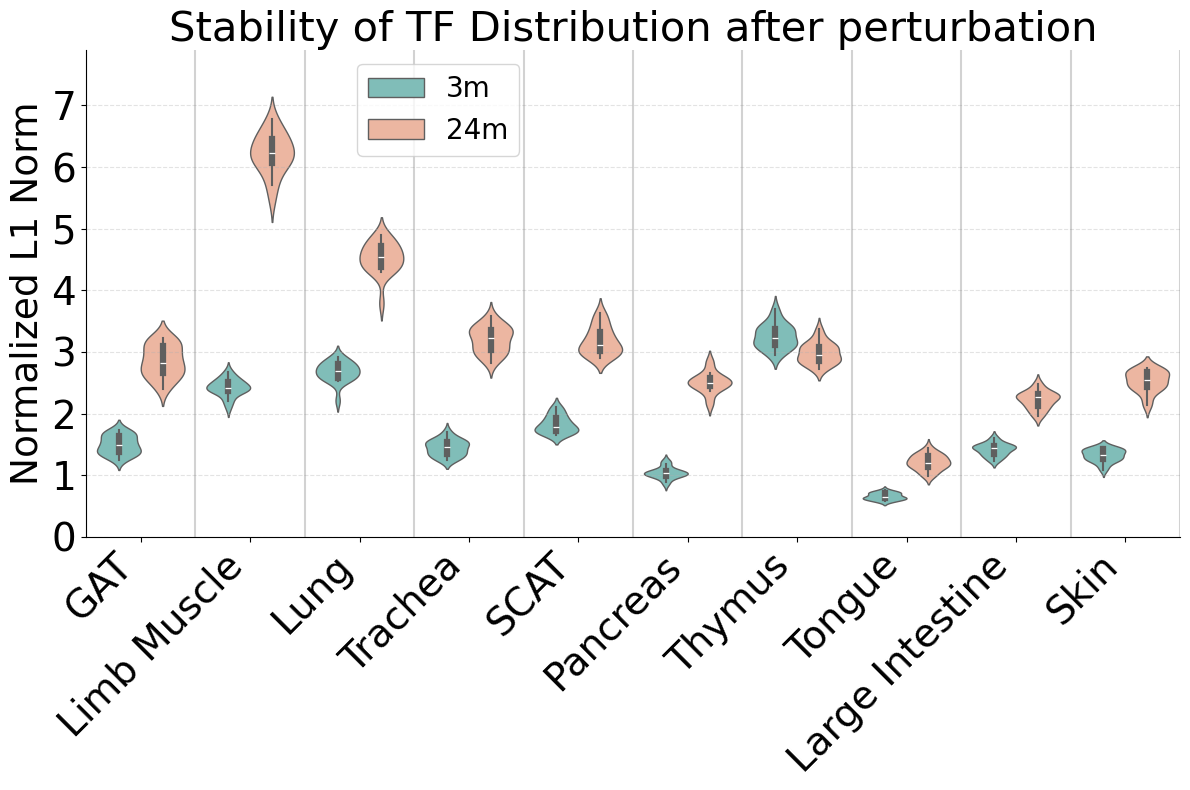

(20,)

In [8]:
df_long = (
    L1_df
    .melt(id_vars="Tissue", 
          value_vars=["L1 TF 3m", "L1 TF 24m", "L1 TG 3m", "L1 TG 24m"],
          var_name="Category", value_name="Values")
    .explode("Values")   # turn lists into rows
)

# Parse 'Category' into Type (TF/TG) and Age (3m/24m)
df_long["Type"] = df_long["Category"].str.extract(r"L1 (TF|TG)")
df_long["Age"]  = df_long["Category"].str.extract(r"(3m|24m)")
df_long["Values"] = df_long["Values"].astype(float)
import seaborn as sns
import matplotlib.pyplot as plt
color_3m = '#76c7c0'
color_24m = '#f9b194'
# violin plot: one axis, grouped by Tissue
fig, axs = plt.subplots(1, figsize = (12,8))
df_long["Tissue"] = df_long["Tissue"].str.replace('_', ' ')
tissue_order = df_long["Tissue"].unique().tolist()
ax = sns.violinplot(
    data=df_long[(df_long["Type"]=='TF')],# & (df_long['Tissue'] == 'Limb_Muscle')], # This would make it Figure 5c
    x="Tissue", y="Values",
    hue="Age", # for each tissue, separate vals for ages
    split=False,
    #order = ['3m', '24m'],
    #dodge=True,
    inner="box",
    linewidth=1.0,
    density_norm="width",
    palette=['#76c7c0','#f9b194']    # or your custom ['grey','lightgreen','pink','cornflowerblue']
)

sns.despine(left=False, bottom=False, top=True, right=True)

plt.ylim([0,7.9])


plt.xlabel("", fontsize=0)
plt.ylabel(f'Stability Score', fontsize=27)
plt.title(f"Stability of TF Distribution after perturbation", fontsize=30)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(
    fontsize=20,
    loc='upper left',
    bbox_to_anchor=(0.235, 1)
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

ax.yaxis.grid(True, linestyle="--", alpha=0.35)
for n in range(len(tissues)+1):
    plt.axvline(n-0.5, c='grey', alpha=0.35)



plt.tight_layout()
if save == True:
    plt.savefig(f'paper_figs_final/stability_tfs_summary.pdf', dpi=300)
plt.show()
L1_arr_3m_tf.shape

# Figure 6: KI

In [13]:
age=3
t ='Limb_Muscle'
gene_data3 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data3 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')
nG, nC = gene_data3.shape

age = 18 
gene_data18 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data18 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')

age = 24
gene_data24 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data24 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')

data_mi_ki_by_mi = loadmat(f'grant_figs_and_data/fig_MI_ki_toptfs_by_mi.mat')
data_mi_swap_all = loadmat(f'grant_figs_and_data/MI_swap_vals.mat')
data_mi_swap_limb = loadmat(f'grant_figs_and_data/MI_swap_vals_limb.mat')
data_mi_swap_diff_limb = loadmat(f'grant_figs_and_data/MI_swap_diff_limb.mat')
data_mi_swap_diff_all = loadmat(f'grant_figs_and_data/MI_swap_diff_all.mat')


L1 = np.load(f'ki_mean/L1_ki_MI_{t}.npy')
diff = tf_data3.mean(axis=1) - tf_data24.mean(axis=1)

L1.shape, diff.shape

((849,), (849,))

## Figure 6a: CDF labeled with top5 ki TFs

sum is -0.023856741605160426
[135 134   2 146 202] ['E2f6' 'E2f5' 'Aebp1' 'Egr3' 'Foxo4']
[0.07309537 0.07348026 0.07443292 0.07444063 0.07456075] [0.99882214 0.99764429 0.99646643 0.99528857 0.99411072] ['E2f6' 'E2f5' 'Aebp1' 'Egr3' 'Foxo4']
0 E2f6 0.07171947 0.87
1 E2f5 0.07348025960574371 0.77
2 Aebp1 0.0755 0.67
3 Egr3 0.07753292 0.97246643
4 Foxo4 0.08076572 0.77285512
[0.07309537 0.07348026 0.07443292 0.07444063 0.07456075] Foxo4 0.09665253180708262 [0.01060071 0.00942285 0.00824499 0.00706714 0.00588928 0.00471143
 0.00353357 0.00235571 0.00117786 0.        ]


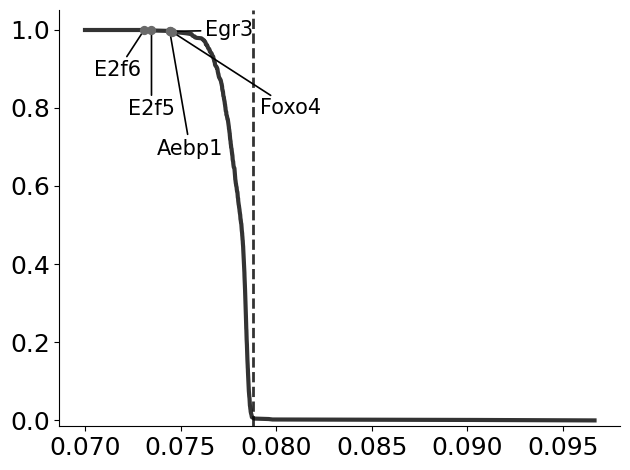

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as pe

# --- Prepare Data ---
sorted_data_dense = np.sort(L1/nG)
ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

TF_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

# --- Plot Setup ---
fig, ax = plt.subplots()
L1_data = np.load(f'ki_mean/L1_ki_MI_{t}.npy') #p.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2)

# Plot CCDF curve
ax.plot(sorted_data_dense, ccdf_dense, c='black', lw=3, alpha=0.8, label='KI')
ax.plot([.07, sorted_data_dense[0]], [1,1], c='black', lw=3, alpha=0.8, label='KI')

# Scatter for lowest 8 points
lowest_idx = np.argsort(L1)[:5]
#ax.axvline((np.sum(L1[lowest_idx]-L1_data)+L1_data)/nG, c='red', label='L1 sum', alpha=0.8, ls='--', linewidth=2)
print('sum is', np.sum(L1[lowest_idx]-L1_data)/nG)
ax.scatter(sorted_data_dense[:5], ccdf_dense[:5],
           s=30, c='dimgrey', edgecolor='dimgrey', linewidth=1.2, zorder=5)

test = [(0.08092224585836727, 0.8338661730887879, 'Ebf2'),
 (0.07830887627664393, 0.8736889337596051, 'Ebf1'),
 (0.07360563328610983, 1.0220090863200402, 'Aebp1'),
 (0.0761947238899916, 0.8001009591115597, 'Elf3'),
 (0.0792049110152264, 0.7579224858376802, 'Foxq1'),
 ]
# --- Label points ---

print(lowest_idx, TF_names[lowest_idx])

x = sorted_data_dense[:5]#lowest_idx]
y = ccdf_dense[:5]#lowest_idx]
label = TF_names[lowest_idx]

xtexts = [0.07721947-.0055, x[1], 0.0755, 0.07753292, 0.08076572] 
ytexts = [0.87, 0.77, 0.67, 0.97246643 ,0.77285512] 
labels = ['Ebf2', 'Ebf1' ,'Aebp1' ,'Elf3' ,'Foxq1', 'Tcf7l1' ,'Snai1' ,'Creb5']

print(x, y, label)

i=0

for idx in lowest_idx:
    x = sorted_data_dense[i]
    y = ccdf_dense[i]
    label = TF_names[idx]
    # Example: move label straight up by 0.05
    x_text = xtexts[i]
    y_text = ytexts[i]
    print(i, label, x_text, y_text)
    i+=1

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=15,
        color='black',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',
        zorder = 5-i
    )
    
# --- Style & Axes ---
#ax.set_xlim(sorted_data_dense.min() * 0.98, sorted_data_dense.max() * 1.02)
ax.set_ylim(-0.015, 1.05)
#ax.set_xlim(0.0726, 0.076)

#ax.set_xticks([0.07, 0.08, 0.09, 0.10])
ax.tick_params(labelsize=18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('paper_figs_final/labeled_top5_tfs.pdf', dpi=300)
print((L1/nG)[lowest_idx], label, sorted_data_dense[-1], ccdf_dense[-10:])

plt.show()


In [79]:
for idx in lowest_idx:
    x = sorted_data_dense[idx]
    y = ccdf_dense[idx]
    label = TF_names[idx]

    # Example: move label straight up by 0.05
    x_text = x
    y_text = y + 0.05

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=13,
        color='darkblue',
        weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',              # vertical alignment
    )

In [84]:
def bootstrap_ci(x, n_boot=1000, ci=95):
    means = np.array([np.mean(np.random.choice(x, size=len(x), replace=True)) for _ in range(n_boot)])
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(x), lower, upper

data_mi_swap_diff_all['Limb_Muscle'] 

({'3m vs 24m': array([1.7198263e-07, 1.8552852e-01, 2.2468200e-01, ..., 1.3582967e-01,
         2.1653438e-01, 1.1815256e-01], shape=(16394,), dtype=float32),
  '3m distribution in 24m network': array([-5.6843419e-14,  6.3066453e-02,  1.0384430e-01, ...,
          7.3111117e-02,  6.5380067e-02,  3.5715155e-02],
        shape=(16394,), dtype=float32),
  '3m network in 24m distribution': array([1.71982620e-07, 1.70169413e-01, 1.96557537e-01, ...,
         1.12154186e-01, 1.70099333e-01, 9.29386020e-02],
        shape=(16394,), dtype=float32)},
 array(['Thymus', 'Brain_Non-Myeloid', 'Limb_Muscle', 'Skin', 'Pancreas',
        'Diaphragm', 'Trachea', 'Tongue', 'Bladder', 'Large_Intestine',
        'GAT', 'MAT', 'SCAT', 'Lung'], dtype=object))

In [85]:
all_diffs = []
tissues_needed = np.load(f'tissue_order_by_MI_prop.npy', allow_pickle=True)

all_labels = []
all_tissues = []
count=0
print(type(tissues_needed))
for tissue in data_mi_swap_diff_all.keys():
    if not np.any(tissues_needed == tissue):
        continue
    print(tissue)
    arr = data_mi_swap_diff_all[tissue]
    #print(arr.dtype.names)
    count+=1
    for field in arr.keys():
        #print(arr[field][0])
        values = arr[field].flatten()
        all_diffs.append(values)
        all_labels += [field] * len(values)
        all_tissues += [tissue] * len(values)

df_mi = pd.DataFrame({
    'Tissue': all_tissues,
    'Type': all_labels,
    'MI_diff': np.concatenate(all_diffs)
})
df_mi['Tissue'].unique(), np.mean(df_mi[(df_mi['Tissue']=='GAT') & (df_mi['Type'] == '3m distribution in 24m network')]['MI_diff']>0)

<class 'numpy.ndarray'>
Thymus
Brain_Non-Myeloid not in the needed ones
Limb_Muscle
Skin
Pancreas
Diaphragm not in the needed ones
Trachea
Tongue
Bladder not in the needed ones
Large_Intestine
GAT
MAT not in the needed ones
SCAT
Lung


(array(['Thymus', 'Limb_Muscle', 'Skin', 'Pancreas', 'Trachea', 'Tongue',
        'Large_Intestine', 'GAT', 'SCAT', 'Lung'], dtype=object),
 np.float64(0.8941417691857059))

## Figure 6b knock-in scatter

In [ ]:
tf_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)
L1 = np.load(f'ki_mean/L1_ki_MI_{t}.npy')

tf_names[L1.argsort()[:10]] ,


array(['Ebf2', 'Ebf1', 'Aebp1', 'Elf3', 'Foxq1', 'Tcf7l1', 'Snai1',
       'Creb5', 'Atf1', 'Bhlhe40'], dtype=object)

(6000,) (6000,)


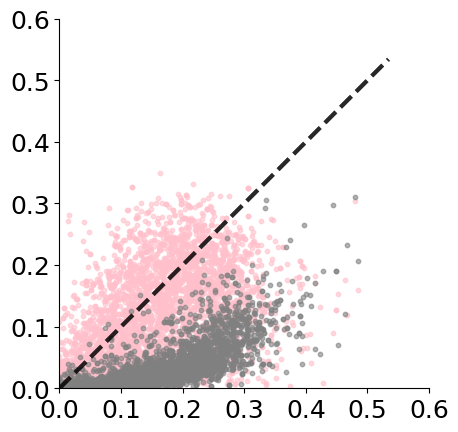

In [122]:
import seaborn as sns
fig, ax = plt.subplots()

colors = sns.color_palette("colorblind", 5)

rand = np.random.randint(data_mi_swap_limb['3m'].shape[0], size = npoints) 
mi_3m = data_mi_swap_limb['3m'][rand]
mi_24m = data_mi_swap_limb['24m'][rand]
mi_ki = data_mi_ki_by_mi['MI_ki_top5'][rand]

plt.scatter(mi_3m, mi_ki, color=colors[-1], label='Data', s=10, zorder=0, alpha=0.6)
plt.scatter(mi_3m, mi_24m, color='grey', label='Data', s=10, zorder=1, alpha=0.6)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [0, 1]
xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1]+0.05)
plt.ylim(0, xs[1]+0.05)
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    


sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,xs[1]+0.05])
ax.set_ylim([0,xs[1]+0.05])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title(f'{t}', fontsize=32)
ax.set_aspect('equal', adjustable='box') 

for coll in getattr(ax, "collections", []):  # collections = scatter plots
    coll.set_rasterized(True)

if save == True:
    plt.savefig(f'{dir_path}/mi_scatter_kim_in_24m.pdf', dpi=200)
